# Applied Statistics Tasks

**Francesco Troja**

***

## Python Libraries

This notebook utilizes a selection of **Python libraries**, each chosen for its specific *functionalities* and *capabilities* to address the diverse needs of the tasks within the project. These libraries were carefully selected to ensure the successful execution of all tasks, aligning with the project’s objectives and technical requirements.

In [1]:
# import libraries
import math
import itertools
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import hypergeom, kstest, fisher_exact, ttest_rel, f_oneway, tukey_hsd
import pandas as pd
import seaborn as sns

## Task 1: **Permutations and Combinations**

<figure style="text-align:center;">
    <img src="images/T1-fisher.png" alt="Lady Testing Tea" width="400"/>
    <figcaption>Photo credit: Zoltan D.<sup>1</sup> </figcaption>
</figure>

### Table of Contents
1. [Problem Statement](#problem_statement)
2. [The Story Behind the Lady Tasting Tea](#2-the-story-behind-the-lady-tasting-tea)
3. [Introduction to Combinatorics in the Lady Tasting Tea Experiment](#3)
   -   [3.1 Permutations](#permutations)
   -   [3.2 Combinations](#combinations)
4. [Choosing the Right Method: Permutations vs. Combinations](#choosing_the_right_method)
5. [Overlap Calculation](#5)
6. [Hypothesis Testing](#6)
   - [6.1 Introduction to Null Hypothesis](#6-1)
   - [6.2 History and application of the Null Hypothesis in the Lady Tasting tea Experiment](#6-2)
   - [6.3 Statistical Tests](#statistical_tests)
   - [6.4 The p-value and Statistical Significance](#p_value)
7. [Calculating the p-value with the hypergeometric distribution](#7-calculating-the-p-value-with-the-hypergeometric-distribution)
8. [Applying Fisher's Exact Test](#8_applying_fishers_exact_test)
9. [References](#references)

### 1. Problem Statement <a class="anchor" id="problem_statement"></a>
> Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.
>
>Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells.
>
>Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error. 
>
>Would you accept two errors? Explain.

### 2. The Story Behind the Lady Tasting Tea <a id="2-the-story-behind-the-lady-tasting-tea"></a>

Before delving into problem resolution, it’s important to provide some context to better understand the origins of the experiment and why it was conducted. This background will help clarify how to approach the task at hand. The "**Lady Tasting Tea**" experiment is a essential example in the field of *statistics* and *hypothesis testing*, introduced by **Ronald A. Fisher** in the 1920s. The experiment was inspired by a claim made during a social gathering at Cambridge, where **Muriel Bristol**, a biologist, confidently stated that she could *distinguish* whether *milk or tea was poured first into a cup of tea*. Fisher, intrigued by her assertion, saw this as an opportunity to design a simple yet robust experiment to test her claim and demonstrate key principles of hypothesis testing. This experiment was groundbreaking because it exemplified how to formalize a question into a testable hypothesis, demonstrating the need for clear null and alternative hypotheses. Fisher’s goal extended beyond testing Bristol’s claim; he aimed to show how randomization and careful design reduce bias and ensure objective conclusions. By asking Bristol to taste eight cups of tea, four prepared each way, presented in a random order, Fisher established a controlled environment to isolate the effect of her ability to distinguish the preparation method from mere chance **$^2$**.

Following Fisher's words in his book The Design of Experiments (1935, p. 13) **$^3$**:
> Our experiment consists in mixing eight cups of tea, four in one way and four in the other, and presenting them to the subject for judgment in a random order. The subject has been told in advance of what the test will consist, namely that she will be asked to taste eight cups, that these shall be four of each kind, and that they shall be presented to her in a random order, that is in an order not determined arbitrarily by human choice, but by the actual manipulation of the physical apparatus used in games of chance cards, dice, roulettes, etc., or, more expeditiously, from a published collection of random sampling numbers purporting to give the actual results of such manipulation. Her task is to divide the 8 cups into two sets of 4, agreeing, if possible, with the treatments received.

### 3. Introduction to Combinatorics in the Lady Tasting Tea Experiment  <a class="anchor" id="3"></a>

In this variation of the experiment, the task is to determine the probability that the participant correctly selects the **six cups** where *milk was poured first* (or tea, depending on the scenario), assuming random guessing without any special knowledge. This involves solving a combinatorial problem to calculate the chances of *selecting six correct cups out of twelve*. Referring again to *The Design of Experiments*, it is noteworthy that Fisher himself advocated for the use of **permutations** and **combinations**, *two essential concepts in combinatorics*, which is the branch of mathematics focused on counting and arrangement:

> [...] There are 70 ways of choosing a group pf 4 objects out of 8. This may be demonstrated by an argument familiar to students of "permutations and combinations," namely, that if we were to choose the 4 objects in succession we should have successively 8, 7, 6, 5 objects to choose from, and could make our succession of choices in 8x7x6x5, or 1680 ways (Fisher, 1935. p.14).

By utilizing these combinatorial methods, the number of possible outcomes can be systematically analyzed, allowing for more precise experimental design and interpretation. In the following section, the concepts of **permutations** and **combinations** will be explored further to clarify their differences and their application in this type of problem **$^4$**.

In [2]:
# total number of cups
n = 12 
# number of cups with milk first (or tea first, depending from the scenario)
k= 6

#### 3.1 Permutations <a class="anchor" id="permutations"></a>

**Permutations** in probability theory refer to the *various ways a set of items can be arranged in a specific order*. A *key characteristic* of permutations is that the **order of the items matters**. For instance, consider a four-digit PIN: each digit must occupy the correct position for the PIN to be valid. If we take the digits 1, 2, 3, and 4, the arrangement "1234" is distinct from "4321." Although both sequences use the same digits, they represent different outcomes because their order differs. There are *three main types* of permutations:

- **Permutations of distinct items**: Where all items are unique.
- **Permutations with repetition**: Where some items may be repeated.
- **Circular permutations**: Where the arrangement is in a circle, changing how we calculate the order **$^{5}$**  **$^{6}$**.

For the scope of this task, the study will focus on the first type of permutation: **permutations of distinct items**. 

The mathematical formula for calculating permutations is:

$$P(n, k) = \frac{n!}{(n - k)!}$$

where:
- *$n$* = total number of items available to choose from
- *$k$* = number of items to arrange
- *$n!$* ($n$ factorial) = product of all positive integers up to $n$
- *$P(n,k)$* = the number of ways to arrange $k$ items out of $n$
- *$(n-k)!$* = factorial of the difference between the total items and the items chosen **$^{7}$**

**note**: A **factorial** is a mathematical function that multiplies a given number *$𝑛$* by every positive integer that precedes it. In simpler terms, the factorial of a number is the *product of all whole numbers from that number down to one*. TThe factorial function is denoted as *$n!$*, and it can be expressed with the following formula **$^{8}$**: $$n!=n×(n−1)×(n−2)×⋯×1$$

In [3]:
# example of permutation calculation
def permutation(n,k):
    return math.factorial(n) // math.factorial(n - k)

print(f"The number of ways to choose {k} cups from {n} is: {permutation(n, k)}")

The number of ways to choose 6 cups from 12 is: 665280


#### 3.2 Combinations <a class="anchor" id="combinations"></a>

**Combinations**, on the other hand, are used to determine how many ways a subset of items can be selected from a larger group when the **order of selection is irrelevant**. For example, if you are choosing three letters—A, B, and C—from a larger group, the selections ABC, ACB, or BAC are considered equivalent, as the order in which they are chosen does not affect the combination. This makes combinations fundamentally different from permutations, where the sequence of selected items matters **$^{9}$**.

The formula to calculate combinations is expressed as:

$$C(n, k) = \frac{n!}{k!(n - k)!}$$

where:
- **$n$** = total number of items
- **$k$** = the number of items to choose
- **$C(n,k)$** = the number of ways to choose $k$ items out of $n$.

The primary distinction between the formulas for permutations and combinations lies in the inclusion of the $k!$ term in the combinations formula. This factor accounts for the fact that in combinations, the order of selection doesn't matter. Consequently, combinations count only the unique groupings of items, disregarding different arrangements of the same set. In contrast, the permutation formula does not include the $k!$ division, which means every possible arrangement of selected items is counted, thus making order an essential component of permutations **$^{9}$**.

In [4]:
# example of combination calculation
def combination(n,k):
    return math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

# Print the result
print(f"The number of ways to choose {k} cups from {n} is: {combination(n, k)}")

The number of ways to choose 6 cups from 12 is: 924


Another simple and efficient method to calculate combinations in Python is by using the `math.comb(n, k)` function from the `math` package. This function takes two parameters: $n$, which represents the total number of items, and $k$, the number of items to be selected. It then returns the number of possible ways to choose k items from n items without considering the order of selection **$^{10}$**.

In [5]:
#using math.comb to calculate combinations
def math_combinations(n, k):
    return math.comb(n, k)


print(f"The number of ways to choose {k} cups from {n} is: {math_combinations(n, k)}")


The number of ways to choose 6 cups from 12 is: 924


### 4. Choosing the Right Method: Permutations vs. Combinations  <a class="anchor" id="choosing_the_right_method"></a>

Given the clear distinction between *permutations* and *combinations*, we can now assess which *method best suits the analysis* of the task at hand. An essential consideration is whether the order of selection matters in the Lady Tasting Tea experiment. Since the task involves choosing a specific set of cups where the arrangement is irrelevant — meaning that it doesn’t matter in which order the cups are selected, only that the correct cups are chosen — it becomes apparent that **combinations**, rather than permutations, are the *appropriate approach* for solving this problem effectively. As shown in the example above, if we use permutations, the number of ways to choose $6$ cups from $12$ is $665,280$. However, using combinations, which disregard the order, the number of ways to choose $6$ cups from $12$ is $924$. This demonstrates the importance of using combinations in this context, as they provide the correct count based on selection alone, without considering the arrangement of the cups.

To further validate this approach, we can use an alternative method to calculate combinations by first calculating the total number of ordered selections, represented by $12!$, and then adjusting for the redundancy introduced by the lack of order in combinations. By dividing the total number of ordered selections by $6!$, we can directly apply the combination formula to obtain the same result.

In [6]:
n_ordered = 12
r_shuffles = 6

# Calculate ways to select 6 cups from 12 using a loop
ways_ordered = 1
for i in range(n_ordered, r_shuffles, -1):
    ways_ordered *= i

# Calculate number of ways to shuffle 6 cups using a loop
no_shuffles = 1
for i in range(1, r_shuffles + 1):
    no_shuffles *= i

# Calculate the total number of combinations
no_combs = ways_ordered // no_shuffles

print(f"Total number of ordered selections: {ways_ordered}")
print(f"Number of ways to arrange 6 selected cups: {no_shuffles}")
print(f"The total number of combinations of selecting 6 cups from 12 is: {no_combs}")

Total number of ordered selections: 665280
Number of ways to arrange 6 selected cups: 720
The total number of combinations of selecting 6 cups from 12 is: 924


This validates the use of combinations in the Lady Tasting Tea experiment, as it accurately determines the number of possible selections of 6 cups from a total of 12, without considering the order of selection.

### 5. Overlap Calculation <a class="anchor" id="5"></a>

This section will focus on visualizing the *different ways* the lady can select between 1 and 6 correct cups from a total of 12 in a random order, given that there are 924 possible combinations. This analysis is crucial for determining the *probability distribution* of various outcomes in the Lady Tasting Tea experiment. By examining how the probability of success changes with the number of correct selections, we can assess whether the lady's ability to correctly identify the cups is due to chance. A *key concept* in this analysis is the idea of **overlaps**, which represent the various ways correct and incorrect selections can coexist within the total set of combinations. For instance, if the lady selects 5 correct cups, the remaining cup must necessarily be incorrect, but the number of ways this can occur differs. Understanding these overlaps enables us to accurately adjust our probability calculations, ensuring they account for all possible configurations of correct and incorrect choices. This approach will give us a clearer picture of the likelihood of achieving certain outcomes and help refine our interpretation of the results.

We can start by creating a *list* that represents the *total number of cups* using Python's `range` function. By default, `range` begins at $0$, but since we want to avoid including a $0$ in our cup labels, we can adjust the starting point to $1$. This ensures that we get a sequence of integers starting from $1$. With $12$ cups in total, this will produce a list of unique labels for each cup, ranging from $1$ to $12$.

In [7]:
# create labels for the cups
labels = list(range(1, n+1))
print(f"The Total number of cups is: {labels}")

The Total number of cups is: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


Now that we have a list containing the total number of cups, we can generate all possible combinations of selecting 6 cups where the milk is added first (or vice versa). To do this, we use the `itertools.combinations(iterable, r)` function. This function is ideal because it generates all unique combinations of a specified length from an input iterable, ensuring no repetition and returning them in lexicographic order. The `itertools.combinations()` function takes two main arguments:

- `iterable`: The input sequence (e.g., a list of cups) from which the combinations are generated.
- `r`: The number of items in each combination (in this case, 6 cups)**$^{11}$**.

**Note**: This function returns an iterator that generates the combinations on demand, rather than precomputing and storing them all at once. For the purposes of this task, however, the result will be stored in a list, making it easy to access all combinations at once in a straightforward manner **$^{12}$**.

In [8]:
# Generate all possible combinations of cups
combs = list(itertools.combinations(labels, k))
print(f"Generated {len(combs)} combinations of {k} elements from the total set of cups:\n ")
for comb in combs:
    # adding -- to separate the combinations
    print(comb, end= "   --   ")

Generated 924 combinations of 6 elements from the total set of cups:
 
(1, 2, 3, 4, 5, 6)   --   (1, 2, 3, 4, 5, 7)   --   (1, 2, 3, 4, 5, 8)   --   (1, 2, 3, 4, 5, 9)   --   (1, 2, 3, 4, 5, 10)   --   (1, 2, 3, 4, 5, 11)   --   (1, 2, 3, 4, 5, 12)   --   (1, 2, 3, 4, 6, 7)   --   (1, 2, 3, 4, 6, 8)   --   (1, 2, 3, 4, 6, 9)   --   (1, 2, 3, 4, 6, 10)   --   (1, 2, 3, 4, 6, 11)   --   (1, 2, 3, 4, 6, 12)   --   (1, 2, 3, 4, 7, 8)   --   (1, 2, 3, 4, 7, 9)   --   (1, 2, 3, 4, 7, 10)   --   (1, 2, 3, 4, 7, 11)   --   (1, 2, 3, 4, 7, 12)   --   (1, 2, 3, 4, 8, 9)   --   (1, 2, 3, 4, 8, 10)   --   (1, 2, 3, 4, 8, 11)   --   (1, 2, 3, 4, 8, 12)   --   (1, 2, 3, 4, 9, 10)   --   (1, 2, 3, 4, 9, 11)   --   (1, 2, 3, 4, 9, 12)   --   (1, 2, 3, 4, 10, 11)   --   (1, 2, 3, 4, 10, 12)   --   (1, 2, 3, 4, 11, 12)   --   (1, 2, 3, 5, 6, 7)   --   (1, 2, 3, 5, 6, 8)   --   (1, 2, 3, 5, 6, 9)   --   (1, 2, 3, 5, 6, 10)   --   (1, 2, 3, 5, 6, 11)   --   (1, 2, 3, 5, 6, 12)   --   (1, 2, 3, 5, 7, 8)   

Now that we have a list containing all possible combinations of selecting 6 cups, we can move forward by focusing on the **actual selection of cups** for the experiment. To do this, we will *randomly select 6 cups* where milks is added first from a total of 12 using simple random sampling. This step mirrors how, in the real-world experiment, the *cups would be chosen without bias*. We implement this randomness using `random.sample(labels, k)`, which ensures that each cup has an *equal probability of being chosen*. This technique is crucial because it maintains the integrity of the experiment by guaranteeing that no prior assumptions or patterns influence the selection of cups. This random selection will be also the key to evaluating the null hypothesis in the later part of the task **$^{13}$** **$^{14}$**.  

In [9]:
# select a random combination of cups
cups_milk_first = random.sample(labels, 6)
print("The randomly selected cups containing milk added first are:\n", cups_milk_first)

The randomly selected cups containing milk added first are:
 [6, 7, 2, 11, 5, 10]


We previously generated 924 possible combinations, and now, by examining the randomly selected sample of cups, we will calculate the overlap between these two sets. This calculation is crucial for evaluating the accuracy of the lady’s guesses by directly comparing the cups she selected to those that are confirmed to have milk added first. By identifying how many of her selections match the correct combinations, we can gain insights into her guessing performance. Beyond accuracy, this overlap also plays a vital role in evaluating the statistical significance of her ability to distinguish between cups. If the number of correct selections significantly exceeds what would be expected by random chance, it would provide evidence in support of her claim of a special skill. Additionally, this analysis will help us identify whether her guessing pattern shows any systematic bias or if it is merely a result of random selection **$^{15}$**.

In [10]:
# Calculate the overlap between each element of combs and labels_milk.
no_overlaps = []

for comb in combs:
  overlap = set(comb).intersection(set(cups_milk_first))
  # adding -- to separate the combinations
  print(comb, overlap, len(overlap), end= "   --   ")
  # Append overlap to no_overlaps.
  no_overlaps.append(len(overlap))

(1, 2, 3, 4, 5, 6) {2, 5, 6} 3   --   (1, 2, 3, 4, 5, 7) {2, 5, 7} 3   --   (1, 2, 3, 4, 5, 8) {2, 5} 2   --   (1, 2, 3, 4, 5, 9) {2, 5} 2   --   (1, 2, 3, 4, 5, 10) {2, 10, 5} 3   --   (1, 2, 3, 4, 5, 11) {2, 11, 5} 3   --   (1, 2, 3, 4, 5, 12) {2, 5} 2   --   (1, 2, 3, 4, 6, 7) {2, 6, 7} 3   --   (1, 2, 3, 4, 6, 8) {2, 6} 2   --   (1, 2, 3, 4, 6, 9) {2, 6} 2   --   (1, 2, 3, 4, 6, 10) {2, 10, 6} 3   --   (1, 2, 3, 4, 6, 11) {2, 11, 6} 3   --   (1, 2, 3, 4, 6, 12) {2, 6} 2   --   (1, 2, 3, 4, 7, 8) {2, 7} 2   --   (1, 2, 3, 4, 7, 9) {2, 7} 2   --   (1, 2, 3, 4, 7, 10) {2, 10, 7} 3   --   (1, 2, 3, 4, 7, 11) {2, 11, 7} 3   --   (1, 2, 3, 4, 7, 12) {2, 7} 2   --   (1, 2, 3, 4, 8, 9) {2} 1   --   (1, 2, 3, 4, 8, 10) {2, 10} 2   --   (1, 2, 3, 4, 8, 11) {2, 11} 2   --   (1, 2, 3, 4, 8, 12) {2} 1   --   (1, 2, 3, 4, 9, 10) {2, 10} 2   --   (1, 2, 3, 4, 9, 11) {2, 11} 2   --   (1, 2, 3, 4, 9, 12) {2} 1   --   (1, 2, 3, 4, 10, 11) {11, 2, 10} 3   --   (1, 2, 3, 4, 10, 12) {2, 10} 2   --   (1

After identifying the overlaps, the next step is to assess the frequency of each overlap level. By using `np.unique()`, we can efficiently calculate the number of occurrences for each outcome— ranging from 0 to 6 correct selections— out of the 924 possible combinations This provides a clear distribution of correct guesses, which is essential for interpreting the outcome **$^{16}$**. 

In [11]:
counts = np.unique(no_overlaps, return_counts=True)
overlap_levels, frequencies = counts

print("Overlap Levels and Their Frequencies:")
for level, freq in zip(overlap_levels, frequencies):
    print(f"Overlap Level {level}: {freq} occurrences")

Overlap Levels and Their Frequencies:
Overlap Level 0: 1 occurrences
Overlap Level 1: 36 occurrences
Overlap Level 2: 225 occurrences
Overlap Level 3: 400 occurrences
Overlap Level 4: 225 occurrences
Overlap Level 5: 36 occurrences
Overlap Level 6: 1 occurrences


Once the overlap levels and their frequencies have been identified, we can begin to interpret the results. The frequency of each overlap level represents how many times a given number of correct selections occurred across the 924 possible combinations. This distribution of correct guesses is critical for understanding the lady's performance in the context of random chance.
To illustrate these results and gain a clearer understanding of the probability distribution, we can visualize the data in a bar chart. This visualization will help us assess the relative frequency of each number of correct guesses and provide insight into how likely it is to observe such outcomes in a random setting.

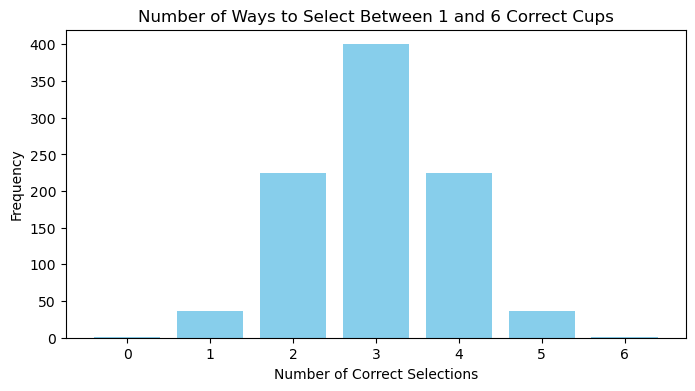

In [12]:
# create a bar plot
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(counts[0], counts[1], color='skyblue')
ax.set_xlabel('Number of Correct Selections')
ax.set_ylabel('Frequency')
ax.set_title('Number of Ways to Select Between 1 and 6 Correct Cups')
plt.show()


The bar chart represents the frequency of each overlap level, which shows how many times the randomly selected set of 6 cups overlaps with each possible combination of 6 cups selected from the 12. This provides a visual representation of the distribution of correct selections under random guessing. By observing the frequency of different overlap levels, we can begin to make sense of the lady's ability to correctly identify the cups with milk added first. If the distribution of overlaps was roughly centered around the lower numbers (indicating more random guesses), it would suggest that the lady’s guesses are consistent with random chance.

### 6. Hypothesis Testing <a class="anchor" id="6"></a>

The second part of this task will explore advanced statistical concepts, concentrating on hypothesis testing to evaluate if an individual can genuinely identify the order in which milk or tea was poured into a cup first. Hypothesis testing is a powerful tool that allows researchers and data analysts to make evidence-based conclusions. This section will begin by introducing the Null Hypothesis, a fundamental component in hypothesis testing, which serves as a baseline assumption and is pivotal for interpreting test results **$^{17}$**. 

#### 6.1 Introduction to Null Hypothesis <a class="anchor" id="6-1"></a>

Hypothesis testing is a statistical process designed to evaluate two opposing hypotheses to draw conclusions based on experimental data. These hypotheses are:  

-  **The null hypothesis** (*$H_0$*): Assumes no specific effect, relationship, or difference exists in the data. It attributes any observed variations to *random chance*, serving as the default position in an experiment.
-  **The alternative hypothesis** (*$H_1$*): Proposes that a significant effect, difference, or relationship does exist, challenging the assumptions of the null hypothesis.
  
At the conclusion of a hypothesis test, one of two decisions is made:

- **Insufficient Evidence to Reject the Null Hypothesis**: indicates that observed differences are likely due to random variation or sampling error.
- **Sufficient Evidence to Reject the Null Hypothesis**: The results are statistically significant, indicating strong evidence against the null hypothesis.

Importantly, failing to reject $H_0$ does not confirm its truth; rather, it reflects insufficient evidence to support $H_1$. This probabilistic nature of hypothesis testing highlights that conclusions rely on evidence strength rather than absolute certainty. **$^{18}$**.

#### 6.2 History and application of the Null Hypothesis in the Lady Tasting tea Experiment  <a class="anchor" id="6-2"></a>

*The concept of the null hypothesis* was first introduced by **Ronald Fisher** in the early 20th century. Fisher's major work, **Statistical Methods for Research Workers**, first published in 1925, laid the foundation for significance tests. In this book, Fisher emphasized the importance of hypothesis testing in scientific research, advocating for a systematic approach to inferential statistics that allows researchers to draw conclusions based on experimental data. **$^{19}$**

In his later work, **The Design of Experiments**, Ronald A. Fisher *elaborated on the concept of the null hypothesis*, particularly through the lens of the Lady Tasting Tea experiment. He proposed that:

> Our examination [...] has therefore led us to a statistical test of significance, by which these results are divided into two classes with opposed interpretations. [...] The two classes of results which are distinguished by our test of significance are, on the one hand, those which show a significant discrepancy from a certain hypothesis; namely, in this case, the hypothesis that the judgments given are in no way influenced by the order in which the ingredients have been added; and on the other hand, results which show no significant discrepancy from this hypothesis. [...] In relation to any experiment, we may speak of this hypothesis as the 'null hypothesis.' It should be noted that the null hypothesis is never proved or established, but is possibly disproved in the course of experimentation. Every experiment may be said to exist only to give the facts a chance of disproving the null hypothesis. (Fisher, pp. 18-19).

The Lady Tasting Tea experiment exemplifies Fisher's framework of hypothesis testing. In this experiment, the hypotheses can be stated as:

- **Null Hypothesis** (*$H_0$*): *The lady is guessing*; her ability to correctly identify the order of milk and tea is due to **random chance**. 
- **Alternative hypothesis** (*$H_1$*): *The lady has a special ability* to distinguish the order in which the milk and tea were added.

The goal of the experiment is to determine whether there is sufficient evidence to reject *$H_0$* in favor of *$H_1$*. To achieve this, we rely on statistical tests, which provide a framework for evaluating the evidence against the null hypothesis.

#### 6.3 Statistical Tests <a class="anchor" id="statistical_tests"></a>

A **statistical test** is a tool used to evaluate whether the sample data provides *enough evidence* to support the alternative hypothesis or if the null hypothesis cannot be rejected. The **choice of statistical test** depends on several factors, including the *distribution of the sample data* (e.g., normality), *sample size*, *variance*, and the *type of data* being analyzed **$^{20}$**.

Statistical tests can be broadly categorized into *two types*:

- **Parametric Tests**: These tests assume that the *sample data follows a specific distribution*, often normal, and make inferences about population parameters (e.g., mean, variance). Common examples include the **$t$-test** and **ANOVA**.
- **Non-Parametric Tests**: These tests *do not assume a particular population distribution*. They are more flexible and suitable for ordinal, ranked, or non-normally distributed data. Examples include the **Mann-Whitney U test**, **Kruskal-Wallis test**, and **Wilcoxon signed-rank test** **$^{21}$**.

Additionally, statistical tests can be classified by the directionality of the hypothesis:

- **One-Tailed Test**: It examines evidence in only one direction, testing if a value is either greater than or less than a specified threshold.
- **Two-Tailed Test**: It examines evidence in both directions, testing if a value is either higher or lower than a certain threshold **$^{22}$**.

In the Lady Tasting Tea experiment, we deal with *categorical data*, and the test does *not rely on specific distributional assumptions*. The data follows a discrete probability model, due to the finite and countable nature of the sample (cups of tea), with no continuous variables involved. Discrete tests typically apply distributions like the *binomial*, *Poisson*, or *geometric*. However, these distributions assume conditions like independent trials and sampling with replacement, which do not apply here since cups are sampled without replacement. Each selection influences the probability of the next, creating dependency between trials. This violation of the binomial distribution assumptions requires us to use the **hypergeometric distribution**, which models dependent trials in a finite population **$^{23}$** **$^{24}$**.

The *hypergeometric distribution* is particularly well-suited for the Lady Tasting Tea experiment as it accounts for:

- A finite population with a fixed number of "successes" (milk-first cups) and "failures" (tea-first cups).
- Sampling without replacement, where each draw influences the next.
  
Regarding the choice of one-tailed or two-tailed tests, for this analysis, a one-tailed test is more appropriate. We are specifically interested in whether the lady's performance exceeds what would be expected by chance. Thus, we are testing whether her performance is significantly better than random guessing, making a one-tailed test the correct choice.

#### 6.4 The p-value and Statistical Significance <a class="anchor" id="p_value"></a>

Now that we have selected an appropriate statistical test, we need to understand how to interpret its results. One key concept in hypothesis testing is the **p-value** (probability value). The p-value represents the probability of obtaining the observed data, or something more extreme, assuming the null hypothesis is true. A smaller p-value indicates stronger evidence against the null hypothesis.
If the *p-value* is **smaller** than the chosen significance level (denoted as $\alpha$), we *reject the null hypothesis*, indicating that the observed effect is statistically significant. If the *p-value* is **greater** than $\alpha$, we *fail to reject the null hypothesis*, suggesting that the observed effect is not statistically significant.
A common threshold for $\alpha$ is $0.05$, which means that we are willing to accept a $5%$ chance of wrongly rejecting the null hypothesis when it is actually true. Fisher advocated for using this threshold to determine statistical significance, stating that it helps filter out fluctuations that could arise purely from random chance **$^{25}$**. He noted:

>"It is usual and convenient for experimenters to take 5 per cent. as a standard level of significance, in the sense that they are prepared to ignore all results which fail to reach this standard, and, by this means, to eliminate from further discussion the greater part of the fluctuations which chance causes have introduced into their experimental results."(Fisher, pp. 15-16)

In the context of the Lady Tasting Tea experiment, if the p-value is less than 0.05, we would reject the null hypothesis and conclude that the lady's ability to distinguish the order of milk and tea is statistically significant, meaning her performance is not due to chance. Conversely, if the p-value exceeds 0.05, we would fail to reject the null hypothesis, suggesting that the lady’s performance could be attributed to random chance **$^{26}$**.

###  7. Calculating the p-value with the hypergeometric distribution <a class="anchor" id="7-calculating-the-p-value-with-the-hypergeometric-distribution"></a>

Having established a clear understanding of the statistical test to implement, we can now proceed with the **Python implementation**. A critical aspect of calculating the *hypergeometric distribution* is deciding which function to use, as each one is designed for different purposes and can yield distinct p-values. The available functions include the **Probability Mass Function (PMF)**, **Cumulative Distribution Function (CDF)**, and **Survival Function (SF)**. To determine the best fit for the Lady Tasting Tea experiment, we need to explore the role of each function and assess which aligns with our objectives. The **PMF** provides the *probability of observing a specific number of correct guesses*, say $k$. This is useful when we want to calculate the likelihood of a very particular outcome. On the other hand, the **CDF** computes the *probability of observing up to a certain number of correct guesses* by summing the probabilities of all outcomes less than or equal to $k$. The **SF**, which is the complement of the CDF, gives the *probability of observing at least $k$ correct guesses*. This is numerically more stable, especially for extreme values or tail probabilities, making it a preferred choice in many cases. In the context of the Lady Tasting Tea experiment, the *Survival Function (SF)* is the **most appropriate** tool. It answers the critical question: "What is the probability of observing at least as many correct cups as the lady did, assuming random guessing?" This aligns perfectly with our goal of determining the statistical significance of her performance. The SF function helps us understand whether her results are likely due to chance or if they reflect a non-random ability to distinguish the cups **$^{27}$**.

To implement the hypergeometric survival function, we will use the [`hypergeom.sf`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.hypergeom.html) function from Python's SciPy library. The formula for the hypergeometric survival function is:


$$P(X \geq K) = 1 - \sum_{k=0}^{K-1} \frac{\binom{n}{k} \binom{M - n}{N - k}}{\binom{M}{N}}$$

where:
- $M$: the total population size;
- $K$: the number of successes in the population;
- $n$: the number of draws (the sample size);
- $N$: the number of observed successes in the drawn sample **$^{28}$**.

In [13]:
# Total cups
M = 12
# number of successes      
K = 6
# number of draws       
n = 6
# Significance level       
alpha = 0.05  

# Initialize lists to store results
success_counts = []
p_values = []

# N is the number of observed successes in the drawn sample
for N in range(0, K + 1):  
    # Calculate the p-value
    p_value = hypergeom.sf(N - 1, M, K, n)
    
    success_counts.append(N)
    p_values.append(p_value)
    
    if p_value < alpha:
        decision = "Reject the null hypothesis"
    else:
        decision = "Fail to reject the null hypothesis"
    
    print(f"Correct Cups Choice: {N},\t\t P-value: {round(p_value,5)},\t\t Decision: {decision}")

Correct Cups Choice: 0,		 P-value: 1.0,		 Decision: Fail to reject the null hypothesis
Correct Cups Choice: 1,		 P-value: 0.99892,		 Decision: Fail to reject the null hypothesis
Correct Cups Choice: 2,		 P-value: 0.95996,		 Decision: Fail to reject the null hypothesis
Correct Cups Choice: 3,		 P-value: 0.71645,		 Decision: Fail to reject the null hypothesis
Correct Cups Choice: 4,		 P-value: 0.28355,		 Decision: Fail to reject the null hypothesis
Correct Cups Choice: 5,		 P-value: 0.04004,		 Decision: Reject the null hypothesis
Correct Cups Choice: 6,		 P-value: 0.00108,		 Decision: Reject the null hypothesis


### 8. Applying Fisher's Exact Test <a class="anchor" id="8_applying_fishers_exact_test"></a>

Let's conduct the final test before drawing our conclusions. An important consideration regarding the hypergeometric test is that it generally assumes a larger sample size, which is common in many applications. However, in our case, with a relatively small sample size, we need to turn to **Fisher’s Exact Test** for a more reliable and precise analysis. Fisher’s Exact Test is particularly useful when dealing with **small sample sizes** or when the expected **frequencies are low**, as it calculates the exact probability of obtaining a distribution of values in a contingency table, given the marginal totals. In the context of the Lady Tasting Tea experiment, we can apply Fisher’s Exact Test to assess whether the observed distribution of correct and incorrect guesses is statistically significant. While the hypergeometric distribution models the experiment under the assumption of sampling without replacement, Fisher's Exact Test enables us to evaluate the association between the variables (correct and incorrect guesses) more precisely **$^{29}$**. 

After obtaining the result from Fisher’s Exact Test, we will compare its p-value with that from the hypergeometric test. If the p-values from both tests align, we can be more confident in the validity of the results. However, if the p-values differ significantly, the Fisher’s Exact Test may offer a more accurate measure, especially in cases where small expected frequencies or categorical data could influence the outcome of the hypergeometric test.

To perform Fisher's exact test, we use the `fisher_exact` function from the scipy library, specifying the alternative parameter to define the hypothesis being tested. The default, '*two-sided*', calculates the probability of a random table with a probability as extreme as the observed one in either direction. The '*greater*' option computes the probability of observing a value greater than or equal to the input, while '*less*' calculates the probability of observing a value less than or equal to the input. For the Lady Tasting Tea experiment, where the goal is to determine if the participant's performance exceeds chance, the *appropriate choice* is '**greater**' **$^{30}$**.

In [14]:
# Total cups
M = 12
# Number of successes (correct guesses)
K = 6
# Number of draws (correct cups guessed)
n = 6
# Significance level
alpha = 0.05

# Initialize lists to store results
success_counts_exact_test = []
p_values_exact_test = []

# Iterate through all possible numbers of correct cups guessed (0 to K)
for N in range(0, K + 1):
    # Create the contingency table based on N correct cups guessed
    # Table: [correct guesses, incorrect guesses], [other conditions]
    table = [[N, n - N], [K - N, M - n - (K - N)]]
    
    # Apply Fisher's Exact Test
    _, p_value = fisher_exact(table, alternative = "greater")

    success_counts_exact_test.append(N)
    p_values_exact_test.append(p_value)

    # Decision based on the p-value
    if p_value < alpha:
        decision = "Reject the null hypothesis"
    else:
        decision = "Fail to reject the null hypothesis"

    print(f"Correct Cups Choice: {N},\t\t P-value: {round(p_value, 5)},\t\t Decision: {decision}")


Correct Cups Choice: 0,		 P-value: 1.0,		 Decision: Fail to reject the null hypothesis
Correct Cups Choice: 1,		 P-value: 0.99892,		 Decision: Fail to reject the null hypothesis
Correct Cups Choice: 2,		 P-value: 0.95996,		 Decision: Fail to reject the null hypothesis
Correct Cups Choice: 3,		 P-value: 0.71645,		 Decision: Fail to reject the null hypothesis
Correct Cups Choice: 4,		 P-value: 0.28355,		 Decision: Fail to reject the null hypothesis
Correct Cups Choice: 5,		 P-value: 0.04004,		 Decision: Reject the null hypothesis
Correct Cups Choice: 6,		 P-value: 0.00108,		 Decision: Reject the null hypothesis


With the p-values calculated for both tests, we can now visualize them in a plot to examine any potential divergence between the two. This comparison will help highlight differences in their statistical significance and trends.

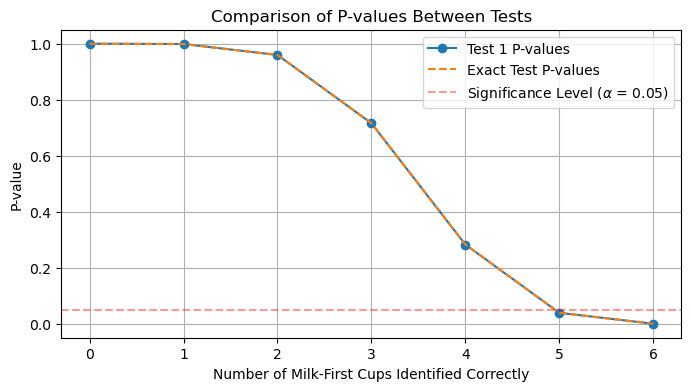

In [15]:
fig, ax = plt.subplots(figsize=(8, 4))

# Plotting the p-values for both tests
ax.plot(success_counts, p_values, marker='o', label="Test 1 P-values")
ax.plot(success_counts_exact_test, p_values_exact_test, linestyle='--', label="Exact Test P-values")

# Adding the significance level line
ax.axhline(y=alpha, color='r', linestyle='--', alpha = 0.4, label="Significance Level ($\\alpha$ = 0.05)")

# Setting labels and title
ax.set_xlabel('Number of Milk-First Cups Identified Correctly')
ax.set_ylabel('P-value')
ax.set_title("Comparison of P-values Between Tests")

# Adding a legend and grid
ax.legend()
ax.grid()
plt.show()


The results are now clear: both the hypergeometric test and Fisher's exact test yield identical p-values, confirming their consistency. These tests reveal an intriguing pattern: as the number of correctly identified cups increases, the p-value decreases, providing progressively stronger evidence against the null hypothesis. This trend underscores the growing statistical significance of the results as her performance improves.

Notably, even if the lady makes one error, correctly identifying five out of six cups still results in a p-value that allows for rejecting the null hypothesis. This outcome further strengthens the case for her exceptional ability to distinguish the order of milk and tea. When all six cups are chosen correctly, the evidence becomes overwhelmingly compelling, leaving little doubt that her skill is genuine and not a result of random chance.

However, if we allow for two errors, the p-value rises to 0.28355, exceeding the standard significance level. In this scenario, we fail to reject the null hypothesis, suggesting that her performance could plausibly be attributed to chance rather than skill.

### 9. References <a class="anchor" id="references"></a>

**$^1$** Zoltan D. (2008). "*Understanding Psychology as a Science, An introduction to scientific and statistical inference*". Palgrave Macmillan.

**$^2$** Learn Statistics Easily (2023). "*The Statistical Significance of the ‘Lady Tasting Tea’ Experiment*". [Learn Statistics Easily](https://statisticseasily.com/lady-tasting-tea/)

**$^3$** Fisher R. A. (1935). "*The Design of Experiments*". Chapter II: *The principles of experimentation illustrated by a psycho-physical experiment*, p.13 .Oliver and Boyd

**$^4$** Hayes A., Zhi V. H., Tarigan C. (n.d.). "*Combinatorics*. [Brilliant](https://brilliant.org/wiki/combinatorics/#permutations-and-combinations)

**$^{5}$** Frost J. (n.d.). "*Using Permutations to Calculate Probabilities*". [Statistics By Jim](https://statisticsbyjim.com/probability/permutations-probabilities/#:~:text=Permutations%20in%20probability%20theory%20and,order%20of%20numbers%20is%20crucial.)

**$^{6}$** Greeks for greeks (n.d). "*Circular Permutation*". [Greeks for greeks](https://www.geeksforgeeks.org/circular-permutation/)

**$^{7}$** Taylor S. (n.d.). "*Permutation*". [Corporate Finance Institute](https://corporatefinanceinstitute.com/resources/data-science/permutation/)

**$^{8}$** Greeks for greeks (2024). "*Factorial in Maths*". [Greeks for greeks](https://www.geeksforgeeks.org/factorial/)

**$^{9}$** Library and Learning Center (n.d.). "*Statistics*". [Library and Learning Center](https://libraryguides.centennialcollege.ca/c.php?g=717168&p=5128089)

**$^{10}$** Greeks for greeks (2020). "*Python – math.comb() method*". [Greeks for greeks](https://www.geeksforgeeks.org/python-math-comb-method/)

**$^{11}$** LabEx (n.d). "*How to use itertools.combinations in Python?*". [LabEx](https://labex.io/tutorials/python-how-to-use-itertools-combinations-in-python-398083)

**$^{12}$** Stackoverflow (2011). "*Python returning <itertools.combinations object at 0x10049b470> - How can I access this?*". [Stackoverflow](https://stackoverflow.com/questions/5176232/python-returning-itertools-combinations-object-at-0x10049b470-how-can-i-ac)

**$^{13}$** Hayes A., (2024). "*Simple Random Sampling: 6 Basic Steps With Examples*".[Investopedia](https://www.investopedia.com/terms/s/simple-random-sample.asp)

**$^{14}$** Python Documentation (n.d.). "*random — Generate pseudo-random numbers*". [Python Documentation](https://docs.python.org/3/library/random.html#random.sample)

**$^{15}$** Richardson J. T. E. (2021). "*Closer Look at the Lady Tasting Tea*". [Significance](https://doi.org/10.1111/1740-9713.01572), Volume 18, Pages 34–37.

**$^{16}$** Greeks for greeks (2024). "*How to count the frequency of unique values in NumPy array?*". [Greeks for greeks](https://www.geeksforgeeks.org/how-to-count-the-frequency-of-unique-values-in-numpy-array/)

**$^{17}$** Natarajan S. (2021). "*The Ultimate Guide to Hypothesis Testing for beginners*". [Medium](https://medium.com/analytics-vidhya/hypothesis-testing-a-simple-guide-fd08454d55f0)

**$^{18}$** Amanatullah (2023). "*A Comprehensive Guide to Hypothesis Testing: Understanding, Methods, and Applications*". [Medium](https://medium.com/@amanatulla1606/a-comprehensive-guide-to-hypothesis-testing-understanding-methods-and-applications-5e20dffce791)

**$^{19}$** Volchok E. (2020). "*Clear-Sighted Statistics: Module 13: Introduction to Null Hypothesis Significance Testing (NHST)*". [CUNY Queensborough Community College](https://academicworks.cuny.edu/cgi/viewcontent.cgi?article=1111&context=qb_oers#:~:text=The%20null%20hypothesis%20is%20a,process%20of%20nullification%20or%20falsification.&text=In%201925%2C%20the%20British%20statistician,Statistical%20Methods%20for%20Research%20Workers.)

**$^{20}$** Hora S. (2021). "*Understanding Hypothesis Testing*". [Towards Data Science](https://towardsdatascience.com/understanding-hypothesis-testing-65f9b3e9ab1f)

**$^{21}$** Srivastava A. (2017). "*Types of Statistical Tests
*". [Medium](https://medium.com/@anushka.da3/types-of-statistical-tests-b8ceb90e13b3)

**$^{22}$** Verma N. (2023). "*One-tailed and Two-tailed Tests*". [Medium](https://medium.com/@nandiniverma78988/one-tailed-and-two-tailed-tests-df08e3721cfc) 

**$^{23}$** Turney S. (2022). "*Probability Distribution | Formula, Types, & Examples*". [Scribbr](https://www.scribbr.com/statistics/probability-distributions/#:~:text=A%20probability%20distribution%20is%20an,by%20its%20probability%20of%20occurrence)

**$^{24}$** Wroughton J., Cole T. (2013). "*Distinguishing Between Binomial, Hypergeometric and NegativeBinomial Distributions*". [Journal of Statistics Education, Volume 21, Number 1](https://jse.amstat.org/v21n1/wroughton.pdf)

**$^{25}$** Beers B. (2024). "*P-Value: What It Is, How to Calculate It, and Examples*". [Investopedia](https://www.investopedia.com/terms/p/p-value.asp#:~:text=A%20p%2Dvalue%20measures%20the,is%20generally%20considered%20statistically%20significant.)

**$^{26}$** Modirshanechi A. (2020). "*Lady tasting tea: A Bayesian approach*". [Towards Data Science](https://towardsdatascience.com/lady-tasting-tea-a-bayesian-approach-1b0b94ca1530)

**$^{27}$** Kuter K. (2020). "*3.2: Probability Mass Functions (PMFs) and Cumulative Distribution Functions (CDFs) for Discrete Random Variables*". [LibreTexts Statistics](https://stats.libretexts.org/Courses/Saint_Mary's_College_Notre_Dame/MATH_345__-_Probability_(Kuter)/3%3A_Discrete_Random_Variables/3.2%3A_Probability_Mass_Functions_(PMFs)_and_Cumulative_Distribution_Functions_(CDFs)_for_Discrete_Random_Variables)

**$^{28}$** Lenail A. (2017). "*Understanding and Implementing the hypergeometric test in python*". [Medium](https://alexlenail.medium.com/understanding-and-implementing-the-hypergeometric-test-in-python-a7db688a7458)

**$^{29}$** McClenaghan E. (2024). "*The Fisher’s Exact Test*". [Technology Networks](https://www.technologynetworks.com/tn/articles/the-fishers-exact-test-385738)

**$^{30}$** Scipy Documentation (n.d.). "*fisher_exact*". [Scipy Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html)

## Task 2: **Numpy's Normal Distribution**


<figure style="text-align:center;">
    <img src="images/normal-distribution.jpeg" alt="Normal Distribution" width="400"/>
    <figcaption>Photo credit<sup>1</sup> </figcaption>
</figure>

### Table of Contents
1. [Problem Statement](#task2-1)
2. [The Origins of the Normal Distribution](#origin_of_normal_distribution)
3. [Normal Distribution](#normal_distribution)
4. [Python code](#code)
5. [Assessing Normality](#accessing_normality)
6. [Graphical Approach](#graphical_approach)
      - [6.1 Histogram](#histogram)
      - [6.2 Probability Density Function (PDF)](#pdf)
      - [6.3 QQ plot](#qq_plot)
7. [Statistical method](#statistical_method)
     - [7.1 Shapiro–Wilk test](#shapiro)
     - [7.2 Other Statistical Test](#other_test)
8. [References](#task2_end)

### 1. Problem Statement <a class="anchor" id="task2-1"></a>

> In this task you will assess whether `numpy.random.normal()` properly generates normal values. To begin, generate a sample of one hundred thousand values using the function with mean `10.0` and standard deviation `3.0`.
>
> Use the `scipy.stats.shapiro()` function to test whether your sample came from a normal distribution. Explain the results and output.
>
> Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.

### 2. The Origins of the Normal Distribution <a class="anchor" id="origin_of_normal_distribution"></a>

The concept of the **normal distribution** has its roots in the pioneering work of **Abraham de Moivre** (1667–1754), a *prominent statistician of the 18th century* who made significant contributions to probability theory, especially through his analysis of repeated, independent events in gambling, such as coin flips. De Moivre discovered that as the number of trials in these experiments increased, the shape of the binomial distribution of outcomes began to resemble a smooth, symmetric, bell-shaped curve. *This curve*, which later became known as the normal distribution, allowed him to **approximate binomial probabilities with a continuous function**, simplifying the calculation of probabilities for large numbers of events. *In 1733*, de Moivre first published his findings in Latin, introducing what is now recognized as the **central limit theorem**. He later translated this work into English in his book, **The Doctrine of Chances** (1738). De Moivre's insights laid the groundwork for future statisticians like **Pierre-Simon Laplace**, who applied the normal curve to the *analysis of measurement errors*, noting that random fluctuations often followed this bell-shaped pattern. Building on these foundations, **Carl Friedrich Gauss** further developed the normal distribution, especially in his studies of *astronomical data*, where observed measurements tended to cluster around true values with random deviations. *Due to Gauss's substantial contributions*, the normal distribution is also referred to as the **Gaussian distribution** **$^2$**.

### 3. Normal Distribution <a class="anchor" id="normal_distribution"></a>

The **normal distribution** is a *continuous probability distribution* that is **symmetric** about its mean. This means that it describes the probabilities of a continuous random variable, where values can take on any real number within a given range. The symmetry of the normal distribution indicates that data *points close to the mean occur more frequently* than those farther away. In this distribution, the **mean** (average), **median** (middle value), and **mode** (most frequent value) are all identical and *located at the center*, resulting in the characteristic "*bell curve*" shape when graphed. This model describes how the values of a variable are likely to be distributed, making the normal distribution a fundamental concept in statistics. It is especially significant because it accurately represents a wide range of natural phenomena, from biological measurements to social science data. Moreover, it serves as the foundation for many statistical methods and analyses, including hypothesis testing and confidence intervals, due to the *central limit theorem*, which states that the *sum of a large number of independent random variables will tend to follow a normal distribution*, regardless of the original distribution of the variables. The normal distribution is characterized by two key parameters: 

- **the mean ($\mu$)**: Represents the *central tendency* or *average of the distribution*, indicating where the highest point of the curve lies.
- **the standard deviation ($\sigma$)**: Measures the *spread* or *dispersion of the data around the mean*. A larger standard deviation results in a flatter, wider curve, while a smaller standard deviation produces a narrower, taller curve **$^3$**.

To gain a deeper understanding of *how data is distributed in a normal distribution*, we can apply the **Empirical Rule**, commonly referred to as the *68-95-99.7 rule* or the *three-sigma rule*. This principle is based on the observation that nearly *all data points* in a normal distribution *lie within three standard deviations from the mean*. Specifically, the rule indicates that:

- approximately $68%$ of the data falls within one standard deviation ($\pm 1\sigma$) of the mean,
- about $95%$ of the data falls within two standard deviations ($\pm 2\sigma$) 
- and nearly $99.7%$ of the data lies within three standard deviations ($\pm 3\sigma$).

By using this rule, we can quickly assess the spread and variability of the data, allowing us to make inferences about the likelihood of data points falling within specific ranges **$^4$**.

### 4. Python code <a class="anchor" id="code"></a>

Having gained a clearer understanding of the normal distribution, we can now proceed to generate a random sample and examine whether it conforms to the characteristics of a normal distribution. To achieve this, we will use the `random.normal()` from the NumPy library. According to the NumPy documentation, this function generates samples from a normal  distribution, defined by a mean (`loc`), a standard deviation (`scale`), and the desired number of samples (`size`). By generating these random values, we can analyze their distribution and assess whether they align with the theoretical properties of a normal distribution, such as symmetry, the bell-shaped curve, and the empirical rule **$^5$**.

In [16]:
# define Mean and Standard Deviation
mu = 10.0
sigma = 3.0
sample_size = 100000

# Generate a random sample
random_sample = np.random.normal(loc=mu, scale=sigma, size=sample_size)

print(f"Generated a sample of {sample_size} values with mean {mu} and standard deviation {sigma}.")
print(f"The Random Values are:\n {random_sample}")

Generated a sample of 100000 values with mean 10.0 and standard deviation 3.0.
The Random Values are:
 [12.39977771  7.83178519 12.14855758 ...  8.96631973  8.33183612
  6.43832214]


### 5. Assessing Normality <a class="anchor" id="accessing_normality"></a>

Evaluating whether a random sample follows a normal distribution involves two primary approaches: **graphical techniques**, that allow for visual inspection of the sample's distribution, highlighting deviations from normality, and **statistical tests**, that provides formal, quantitative evaluations, offering objective criteria for determining normality. By combining these approaches, we can gain a comprehensive understanding of the sample's distribution characteristics **$^6$**.

Before exploring the analysis of various plots and statistical tests, it is essential to begin with a **descriptive analysis** of our sample. This initial step will provide a foundational understanding of key characteristics of the data, including *central tendency*, *variability*, and *distribution shape*. While the mean and standard deviation were predetermined during the random sample generation process, our focus will shift to evaluating the *skewness* and *kurtosis*:

- **Skewness** measures the asymmetry of the distribution. A value of **$0$**  indicates *perfect symmetry*. **Positive skewness** suggests a *longer tail on the right*, with more values clustered on the left, while **negative skewness** indicates a *longer tail on the left*, with values concentrated on the right.

- **Kurtosis** measures the "*tailedness*" of the distribution, indicating the *presence of extreme values or outliers*. **Positive kurtosis** (leptokurtic) implies a *sharper peak* and *heavier tails*, indicating more extreme values. **Negative kurtosis** (platykurtic) signals a *flatter peak* with *lighter tails*, suggesting fewer extreme values. A kurtosis near 0 (mesokurtic) implies the distribution is similar to a normal distribution **$^7$**.

In [17]:
# calculate skewness and kurtosis
skewness = stats.skew(random_sample)
kurtosis = stats.kurtosis(random_sample)

print(f"Skewness and Kurtosis for the sample are: {skewness} and {kurtosis}")

Skewness and Kurtosis for the sample are: -0.01676412818024069 and -0.015234611385953833


The results of our sample analysis reveal that the distribution exhibits a near-symmetric shape, with a slight leftward skew, indicating a small tendency for a longer tail on that side. This minimal skewness suggests the data is relatively balanced around the mean.

Additionally, the kurtosis value points to a distribution that is close to mesokurtic, implying that its shape resembles that of a normal distribution. This observation indicates that the data does not contain notable outliers or extreme values.

Together, these findings lead us to conclude that the distribution of our sample approximates a normal distribution, characterized by slight skewness and a lack of significant excess kurtosis.

### 6. Graphical Approach <a class="anchor" id="graphical_approach"></a>

A **graphical approach** offers a *visual exploration of data distributions*, enhancing our ability to assess normality. These techniques allow us to spot patterns, trends, or irregularities that may not be immediately evident through numerical analysis alone.

#### 6.1 Histogram <a class="anchor" id="histogram"></a>

One of the most commonly used graphical methods is the *histogram*. **Histograms** are particularly effective because they offer a clear and intuitive representation of the *frequency distribution of data*. Unlike bar charts, which are primarily used for categorical data, **histograms** are specifically designed to *display the distribution of continuous variables*. This allows us to visualize how *data points* are *spread across various intervals*, known as "**bins**". The *visual representation* provided by histograms enables us to discern the overall shape of the distribution, revealing whether it is *symmetric*, *skewed*, or exhibits multiple *peaks* (modes). One of the primary advantages of using histograms is their ability to facilitate a quick visual assessment of normality. By simply observing the shape of the histogram, we can quickly gauge if the data approximates a normal distribution or if there are significant deviations, such as skewness (asymmetry) or kurtosis (peakedness). Moreover, the choice of bin width in a histogram offers flexibility regarding the level of detail displayed. By adjusting the number of bins, we can emphasize different aspects of the distribution. A larger bin width provides a broad overview of the data, while a smaller bin width allows for a more detailed examination of specific value ranges, highlighting nuances that may otherwise go unnoticed. This adaptability makes histograms a powerful tool for assessing normality and understanding the underlying structure of the data **$^8$**.

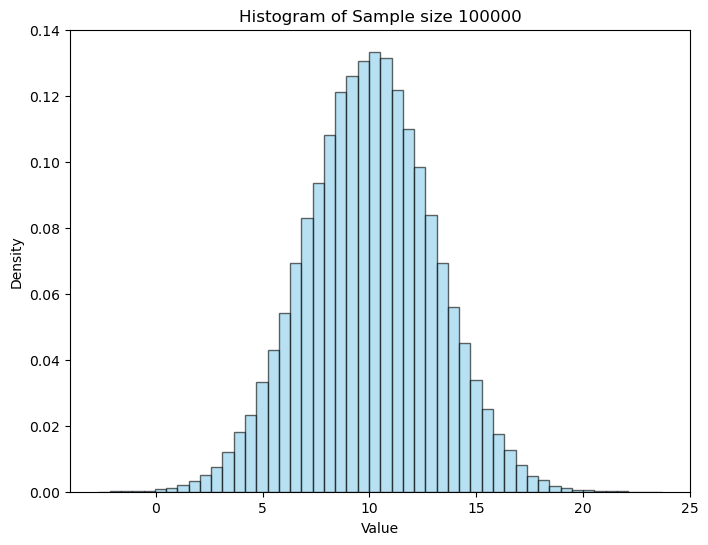

In [18]:
# create a histogram
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(random_sample, bins=50, density=True, alpha=0.6, color='skyblue', edgecolor='black')
ax.set_title(f"Histogram of Sample size {sample_size}")
ax.set_xlabel("Value")
ax.set_ylabel("Density")
plt.show()


The histogram analysis suggests that the data approximates a normal distribution. The bell-shaped, symmetric curve, centered around the mean, indicates an even distribution of values. This symmetry implies that most observations are concentrated around the central tendency, with fewer values occurring at the extremes, further reinforcing the idea of normality. The data does not exhibit heavy tails or extreme peaks, which aligns with the expected behavior for normally distributed data. 

#### 6.2 Probability Density Function (PDF) <a class="anchor" id="pdf"></a>

Having generated a set of normally distributed values, we now turn our attention to the **Probability Density Function** (PDF), a fundamental concept that describes the likelihood of a continuous random variable taking on a specific value. The PDF serves as another valuable graphical approach for analyzing data distributions. For the normal distribution, the PDF is characterized by its bell-shaped curve, which encapsulates the central tendencies of the data. Mathematically, the PDF of a normal distribution is expressed using the following formula:

$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}$$

Where:
- **$\mu$** is the mean of the distribution;
- **$\sigma$** is the standard deviation;
- **$\sigma^2$** is the variance. It quantifies how much the values in a distribution deviate from the mean.
- **$e$** is Euler's number, approximately equal to 2.71828 **$^9$**.

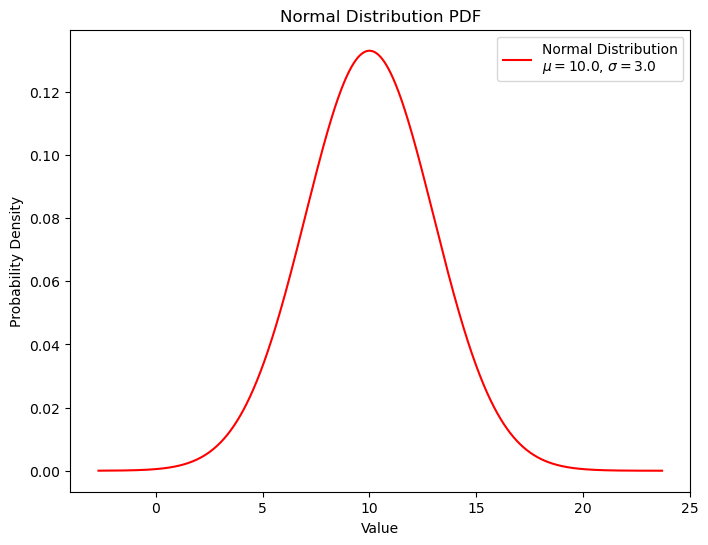

In [19]:
# create function to calculate the normal pdf
def normal_pdf(x, mu, sigma):
    return (1 / (math.sqrt(2 * math.pi) * sigma)) * math.exp(-0.5 * ((x - mu) / sigma) ** 2)


# Generate a range of x values
x_values = np.linspace(min(random_sample), max(random_sample), 100000)

# Calculate the PDF for each x value
pdf_values = [normal_pdf(x, mu, sigma) for x in x_values]

# Plot the PDF
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x_values, pdf_values, color='r', label=f'Normal Distribution\n$\mu={mu}$, $\sigma={sigma}$')
ax.set_xlabel('Value')
ax.set_ylabel('Probability Density')
ax.set_title('Normal Distribution PDF')
ax.legend()
plt.show()

Having visualized both the histogram and the probability density function (PDF), we can now create an additional visualization that overlays these two graphs for a more comprehensive comparison. This combined graphical representation allows us to assess how closely the observed data aligns with the expected normal distribution. By overlaying the histogram with the PDF, we can easily identify significant deviations, such as skewness, which indicates the asymmetry of the distribution, and kurtosis, which reflects the peakedness of the distribution.

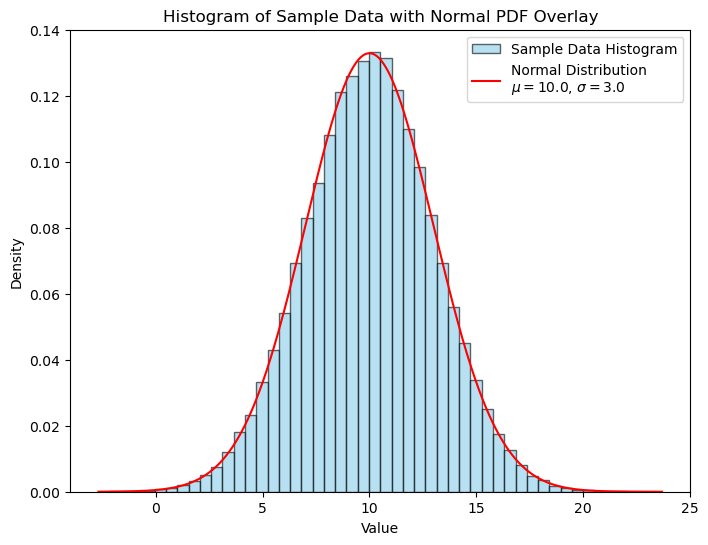

In [20]:
# Plot both the histogram and PDF
fig, ax = plt.subplots(figsize=(8, 6))
# Histogram of the sample data
ax.hist(random_sample, bins=50, density=True, alpha=0.6, color='skyblue',  edgecolor='black',  label='Sample Data Histogram')
# PDF line plot
ax.plot(x_values, pdf_values, color='r', label=f'Normal Distribution\n$\mu={mu}$, $\sigma={sigma}$')
ax.set_title("Histogram of Sample Data with Normal PDF Overlay")
ax.set_xlabel("Value")
ax.set_ylabel("Density")
ax.legend()
plt.show()


The overlay of the histogram and probability density function (PDF) reveals several important insights. The red PDF curve aligns closely with the histogram, showing only minor deviations. These discrepancies can be attributed to sampling variability, which is expected, particularly with a large sample size of 100,000. Given the minimal differences, there is no indication of a significant deviation from normality. Overall, the visual comparison between the histogram and PDF suggests that the generated data closely follows a normal distribution, thereby supporting the assumption of normality for this random sample.

#### 6.3 QQ plot <a class="anchor" id="qq_plot"></a>

One final graphical approach to determine if our data follows a normal distribution is the **QQ (Quantile-Quantile) plot**. This plot compares the *quantiles of our dataset* with the *theoretical quantiles of a normal distribution*, allowing us to visually assess whether the data aligns with the normal distribution. If the points closely follow a straight line, it suggests that our data is approximately normally distributed. Deviations from the line indicate potential departures from normality **$^{10}$**. 

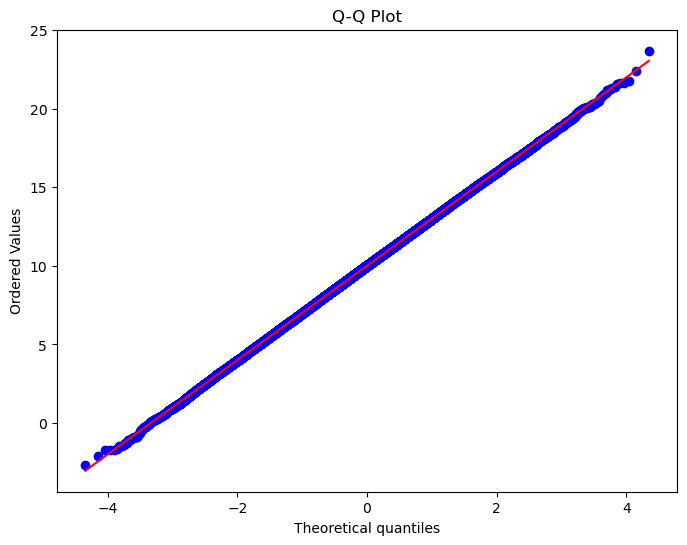

In [21]:
# create a Q-Q plot
fig, ax = plt.subplots(figsize=(8, 6))

stats.probplot(random_sample, dist="norm", plot=ax)
ax.set_title("Q-Q Plot")
plt.show()

Based on the QQ plot, the sample data appears to conform well to a normal distribution. The alignment of the data points with the reference line suggests normality, with no significant departures from the expected shape. This supports the findings from the histogram and the statistical test results, providing further confidence in the assumption of normality for the generated data.

### 7 Statistical method <a class="anchor" id="statistical_method"></a>

Our preliminary visual inspection suggests the *data aligns well with a normal distribution*. However, to ensure a reliable evaluation, we must support this observation with quantitative methods that extend beyond subjective interpretation. To rigorously assess the assumption of normality, we can apply **statistical normality tests** designed to *determine if a sample likely originates from a normally distributed population*, providing an objective perspective to complement our initial visual findings. For continuous data, several common statistical tests are available for normality assessment, including the **Shapiro–Wilk test**, the **Kolmogorov–Smirnov test** etc. These tests quantify the extent to which the data deviates from a normal distribution, offering valuable insights into its characteristics **$^{11}$**.

#### 7.1 Shapiro–Wilk test <a class="anchor" id="shapiro"></a>

The **Shapiro-Wilk test** is a *statistical procedure* designed to assess how closely a sample of data approximates a normal distribution. This test was developed by *Samuel Sanford Shapiro* and *Martin Wilk* in 1965 and was first presented in their influential paper titled "**An Analysis of Variance Test for Normality**". They stated:

>The main intent of this paper is to introduce a new statistical procedure for testing a complete sample for normality. The test statistic is obtained by dividing the square of an appropriate linear combination of the sample order statistics by the usual symmetric estimate of variance. This ratio is both scale and origin invariant and hence the statistic is appropriate for a test of the composite hypothesis of normality. Testing for distributional assumptions in general and for normality in particular has been a major area of continuing statistical research—both theoretically and practically. A possible cause of such sustained interest is that many statistical procedures have been derived based on particular distributional assumptions—especially that of normality (Shapiro, Wilk, 1965. p.591) **$^{12}$**.

Furthermore, they highlighted the effectiveness of their approach, noting that,

> The object of the W test is to provide an index or test statistic to evaluate the supposed normality of a complete sample. The statistic has been shown to be an effective measure of normality even for small samples (n < 20) against a wide spectrum of non-normal alternatives. The W statistic is scale and origin invariant and hence supplies a test of the composite null hypothesis of normality (Shapiro, Wilk, 1965. p.602) **$^{12}$**.

When conducting the test with a *significance level* set at $0.05$, a *p-value* that *exceeds this threshold* leads us to **fail to reject the null hypothesis**. This outcome suggests that there is insufficient evidence to assert that the data deviates from a normal distribution, thereby allowing us to reasonably assume that the data adheres to the characteristics of a normal distribution. In contrast, if the *p-value* is *less than or equal to $0.05$*, we would **reject the null hypothesis**, indicating that the data likely does not follow a normal distribution, which may necessitate the use of different statistical methods for further analysis **$^{13}$**.

To conduct the Shapiro-Wilk test in Python, we can utilize the `shapiro()` function from the SciPy package. This function takes a *single required parameter*, an **input array x**, representing the sample data to be evaluated. Upon execution, `shapiro()` returns two key outputs: the **test statistic** and the **p-value**. The test statistic indicates the degree to which the sample deviates from a normal distribution, while the p-value provides the probability of observing the data given that the null hypothesis is true **$^{14}$**.

In [22]:
# perform the Shapiro-Wilk test
statistic, p_value = stats.shapiro(random_sample)
# sinificance level
alpha= 0.05
print(f'stat= {statistic}\np={p_value}')
if p_value > alpha:
    print('The sample looks Gaussian (fail to reject H0)')
else:
    print('The sample does not look Gaussian (reject H0)')

stat= 0.9999622702598572
p=0.3448323607444763
The sample looks Gaussian (fail to reject H0)


d:\Users\fratr\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


While conducting the Shapiro-Wilk test, we encountered a warning that suggests the p-value produced may not be reliable for sample sizes greater than 5000 observations (N > 5000). This warning highlights an important limitation of the test: as the sample size increases, its sensitivity also rises, potentially compromising the accuracy of the p-value. Consequently, it is essential to interpret the results with caution when dealing with large datasets, as the test may indicate statistical significance even in cases where it may not be practically relevant **$^{15}$**.

To gain a clearer understanding of the results and determine whether we can fail to reject the null hypothesis, we need to analyze the statistic value from the Shapiro-Wilk test. Ideally, this statistic should equal 1 **$^{13}$**. In our analysis, we observe that the statistic value is approximately 0.99, indicating a close proximity to 1. Additionally, the p-value is significantly higher than the 0.05 significance level. Therefore, we can conclude that the data does not significantly deviate from a normal distribution, supporting the validity of the null hypothesis.

#### 7.2 Other Statistical Test <a class="anchor" id="other_test"></a>

To validate the accuracy of the information obtained from the Shapiro-Wilk test and ensure that errors haven't been introduced due to the large sample size, we can attempt to confirm or reject the null hypothesis by applying an additional statistical test: the **Kolmogorov–Smirnov (K-S) test**. It is a widely-used non-parametric test designed to evaluate whether a sample originates from a specified distribution by examining cumulative distribution functions (CDFs). Unlike parametric tests, the K–S test does not require assumptions about the specific shape of the distribution, making it particularly versatile for testing hypotheses about distributional patterns. Developed as part of foundational research in probability theory, the test is named after mathematicians **Andrey Kolmogorov** and **Nikolai Smirnov**, who made significant contributions to its formulation in the 1930s and 1940s. The *K–S test originated* with Kolmogorov’s 1933 work, "**Sulla determinazione empirica di una legge di distribuzione**", in which he introduced the concept of the empirical cumulative distribution (ECD) and proposed a test statistic based on the maximum difference between the ECD and the theoretical cumulative distribution (TCD). Kolmogorov aimed to determine how well empirical data aligned with a theoretical distribution without presupposing a specific form. In 1939, Nikolai Smirnov, working independently, further advanced this non-parametric approach in his article, "**Estimation of the Difference Between Empirical Distribution Functions in Two Independent Samples**". Smirnov proposed a method for comparing two independent samples by defining a test statistic based on the maximum difference between their respective empirical cumulative distributions. Recognizing the similarity between their approaches, Kolmogorov and Smirnov combined their efforts, leading to the unified formulation known today as the Kolmogorov-Smirnov Test **$^{16}$**

In Python, the Kolmogorov-Smirnov (K-S) test can be conducted using the `kstest()` function from the scipy.stats module. This function is particularly suited for performing a one-sample K-S test, as in our case. The purpose of using this test is to compare the sample distribution with a specified theoretical distribution, such as the normal distribution. This test is particularly suitable for larger sample sizes, as it assesses the alignment between the observed distribution and the expected distribution.  

The function takes three main arguments:

- **The sample data**: Here, we use random_sample, representing the data we wish to test.
- **The hypothesized distribution**: In this case, we specify 'norm' to test if our sample approximates a normal distribution.
- **Distribution parameters**: We provide the mean and standard deviation of the normal distribution as additional parameters. These define the specific normal distribution that our sample is tested against **$^{17}$**

In [23]:
# using the same mean and standard deviation as before (mu=10.0, sigma=3.0)
ks_statistic, p_value = kstest(random_sample, 'norm', args=(mu, sigma))

print(f"K-S Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject H0: the sample does not follow a normal distribution.")
else:
    print("Fail to reject H0: the sample is consistent with a normal distribution.")

K-S Statistic: 0.0033674313056090144
P-value: 0.2063627264116945
Fail to reject H0: the sample is consistent with a normal distribution.


The test results provide two key measures:

- **K-S Statistic**: This statistic quantifies the maximum difference between the empirical cumulative distribution function of the sample and the cumulative distribution function of the hypothesized distribution.
- **P-value**: This value indicates the statistical significance of the observed difference **$^{17}$**.

In this case, the K-S statistic is very small, indicating a close alignment between the sample data and the normal distribution. The p-value is greater than the typical significance level of 0.05. This indicates that we fail to reject the null hypothesis that the sample data comes from a normal distribution. In other words, there is no significant evidence to suggest that the sample data deviates from a normal distribution.

Furthermore, the application of two distinct statistical tests has strengthened our confidence in asserting that the sample adheres to a normal distribution. This finding not only validates the statistical analysis but also corroborates the visual alignment between the probability density function (PDF) and the sample histogram. Together, these results affirm the initial observation of normality in the dataset.

### 8. References <a class="anchor" id="task2_end"></a>

**$^1$** Varshney P. (2020). "*The Powers of “Normal Distribution”*". [Linkedin](https://www.linkedin.com/pulse/powers-normal-distribution-paras-varshney/)

**$^2$** Lane D. (2022). "*7.2: History of the Normal Distribution*". [LibreTexts Statistics](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Introductory_Statistics_%28Lane%29/07%3A_Normal_Distribution/7.02%3A_History_of_the_Normal_Distribution)

**$^3$** Chen J. (2024). "*Normal Distribution: What It Is, Uses, and Formula*". [investopedia](https://www.investopedia.com/terms/n/normaldistribution.asp#:~:text=Error%20Code%3A%20100013)

**$^4$** Frost J. (n.d.). "*Empirical Rule: Definition & Formula*". [Statistics by Jim](https://statisticsbyjim.com/probability/empirical-rule/)

**$^5$** Numpy Documentation (n.d.). "*numpy.random.normal*". [Numpy](https://numpy.org/doc/2.0/reference/random/generated/numpy.random.normal.html)

**$^6$** Mishra P., Pandey M. C., Singh U., Gupta A., Sahu C., Keshri A. (2019). "*Descriptive Statistics and Normality Tests for Statistical Data*". [Annals of cardiac anaesthesia, 22(1), 67–72](https://pmc.ncbi.nlm.nih.gov/articles/PMC6350423/#:~:text=The%20two%20well%2Dknown%20tests,%E2%86%92%20normality%20plots%20with%20tests)

**$^7$** MenonK. (2024). "*The Complete Guide to Skewness and Kurtosis*". [simpli learn](https://www.simplilearn.com/tutorials/statistics-tutorial/skewness-and-kurtosis) 

**$^8$** Velez A. (2021). "*differences between histograms and bar charts*". [Storytelling with Data](https://www.storytellingwithdata.com/blog/2021/1/28/histograms-and-bar-charts)

**$^9$** Medium (2020). "*Normal Distribution: Probability Density Function Derivation*". [Medium](https://medium.com/@curiousincosmos/normal-distribution-probability-density-function-derivation-872c4f9d514d)

**$^{10}$** Statistics & Acturial Science (n.d.). "*ECDF, QQ, and PP Plots*". [Statistics & Acturial Science](https://homepage.divms.uiowa.edu/~luke/classes/STAT4580/qqpp.html#:~:text=Both%20QQ%20and%20PP%20plots,standard%20member%20of%20the%20family.)

**$^{11}$** DATAtab Team (2024). "*Normality test*". [DATAtab](https://datatab.net/tutorial/test-of-normality)

**$^{12}$** Shapiro, S. S., & Wilk, M. B. (1965). "*An Analysis of Variance Test for Normality*". [Biometrika](doi:10.2307/2333709)

**$^{13}$** Humaizi A. (2024). "*10.0 Shapiro-Wilk test*".[Medium](https://medium.com/@maizi5469/10-0-shapiro-wilk-test-5be38fd3c2a6#:~:text=Technically%2C%20the%20Shapiro%2DWilk%20test,data%20follow%20a%20normal%20distribution.)

**$^{14}$** Scipy Documentation (n.d). "*Shapiro*". [Scipy](https://scipy.github.io/devdocs/reference/generated/scipy.stats.shapiro.html#shapiro)

**$^{15}$** Stackoverflow (2015). "*Error in shapiro.test : sample size must be between*". [Stackoverflow](https://stackoverflow.com/questions/28217306/error-in-shapiro-test-sample-size-must-be-between)

**$^{16}$** Melanie (2024). "*Kolmogorov-Smirnov Test: Understanding this Statistical Method*". [Datascientest](https://datascientest.com/en/kolmogorov-smirnov-test-understanding-this-statistical-method)

**$^{17}$** Scipy Documentation (n.d.). "*kstest*".[Scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html)

## Task 3: **t-Test Calculation**


<figure style="text-align:center;">
    <img src="images/t_distribution.png" alt="T test" width="800"/>
    <figcaption>Photo credit<sup>1</sup> </figcaption>
</figure>

### Table of Contents
1. [Problem Statement](#1-problem-statement-3)
2. [Exploratory data analysis](#2-exploratory-data-analysis)
3. [$t$-Test Introduction](#3--test-introduction)
   - [3.1 $t$-Test Origin](#31--test-origin)
   - [3.2 $t$-Test: Hypothesis & Assumptions](#32--test-hypothesis--assumptions)
   - [3.3 One Sample $t$-test](#33-one-sample-t-test)
   - [3.4 Paired sample $t$-test](#34-paired-sample--test)
   - [3.5 Independent two-sample $t$-test](#35-independent-two-sample--test)
4. [Choosing the Appropriate $t$-Test for heart beat dataset](#4-choosing-the-appropriate--test-for-heart-beat-dataset)
5. [$t$-test Assumption Check](#5--test-assumption-check)
6. [Performing the $t$-test](#6-performing-the--test)
7. [References](#references-task3)

### 1. Problem Statement <a class="anchor" id="1-problem-statement-3"></a>

> Consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.
 
 | Patient ID | 0  | 1  | 2  | 3  | 4  | 5  | 6  | 7  | 8  | 9  |
 | -----------| :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: |
 | Before     | 63 | 68 | 70 | 64 | 74 | 67 | 70 | 57 | 66 | 65 |
 | After      | 64 | 64 | 68 | 64 | 73 | 70 | 72 | 54 | 61 | 63 |

> Calculate the t-statistic based on this data set, using Python. Compare it to the value given by `scipy.stats`. Explain your work and list any sources used.


### 2. Exploratory data analysis  <a class="anchor" id="2-exploratory-data-analysis"></a>

Before examining the details of the $t$-test, including its hypotheses and underlying assumptions, it is essential to first gain a comprehensive understanding of the dataset associated with the task. The data can be analyzed using two primary approaches: **arrays** (from libraries such as `array` or `numpy`) or **DataFrames** (using the `pandas` library). Each option has unique advantages and limitations. **Arrays** are *basic* and *linear* data structures that *store elements sequentially*, making them particularly useful for straightforward calculations and manipulations. Using arrays, we can create two separate lists for "**Before**" and "**After**" heart rates, performing basic operations to compute statistics like the mean heart rate for each list or calculate the differences between corresponding values. However, **arrays** are relatively *simplistic* and *lack a built-in system* for organizing or labeling data by columns. This limitation becomes apparent as the dataset grows or as additional variables are introduced. In contrast, **DataFrames** offer a more *structured* and *versatile* approach to data analysis. With DataFrames, we can assign clear labels to columns, improving both readability and organization. For instance, in addition to columns for "Before" and "After" heart rates, we could add a "**Difference**" column to record the change in heart rate after an exercise program. This tabular format allows us to efficiently manage and analyze multiple variables simultaneously. Moreover, DataFrames come with a rich set of built-in functions that facilitate statistical calculations, data filtering, and aggregation. These capabilities make it easier to extract insights from the data without requiring additional coding effort **$^2$**.

Considering the enhanced functionality of DataFrames, the resting heart rate data will be stored in a new DataFrame for the subsequent analysis. 

In [24]:
# store the data in a dictionary
heart_rates = {
    "before" : [63, 68, 70, 64, 74, 67, 70, 57, 66, 65],
    "after" : [64, 64, 68, 64, 73, 70, 72, 54, 61, 63]
}

# convert the dictionary to a DataFrame
df = pd.DataFrame(heart_rates)

#visualize the data
df

,before,after
0,63,64
1,68,64
2,70,68
3,64,64
4,74,73
5,67,70
6,70,72
7,57,54
8,66,61
9,65,63


In [25]:
# check dataset information
print("Dataset Information:\n")
df.info()

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   before  10 non-null     int64
 1   after   10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


This new dataset presents a relatively **small sample size**, with both columns containing **continuous** integer values. To gain a deeper understanding of its characteristics, we can begin by examining the statistical summary using the `describe` function. This function generates a comprehensive set of **summary statistics** for numerical columns, including the **mean**, **standard deviation**, **minimum**, **maximum**, and **quartiles** (25th, 50th, and 75th percentiles). These metrics provide valuable insights into the central tendency, variability, and overall distribution of the data **$^3$**.

In [26]:
# check data statistics
print("Dataset Statistics:\n")
df.describe()

Dataset Statistics:



,before,after
count,10.00000,10.000000
mean,66.40000,65.300000
std,4.64758,5.677441
min,57.00000,54.000000
25%,64.25000,63.250000
50%,66.50000,64.000000
75%,69.50000,69.500000
max,74.00000,73.000000


The "**after**" column shows a *slight decrease* in the **central tendency** compared to the "**before**" column, with the **mean** dropping from $66.4$ to $65.3$ and the **median** shifting from $66.5$ to $64.0$. This could indicate a small overall reduction in the values across the dataset after the two weeks exercise program. However, the increase in standard deviation (from $4.65$ to $5.68$) suggests that the spread or variability of the data has increased. This means that while the central values have shifted downward, the "after" dataset exhibits more dispersion, indicating that some data points are more spread out from the central values.

To improve our analysis, *visualizing the data* is crucial for understanding heart rate changes before and after treatment. First, we'll use a **line plot** to observe *trends* and *fluctuations* over time, helping us identify any noticeable differences. Next, a **histogram** will show the distribution of heart rates in each condition, giving us insights into the spread and frequency of values. Visualization helps detect patterns, outliers, or anomalies that may impact the results. It also allows us to check key assumptions for statistical tests, like normality and the absence of outliers.

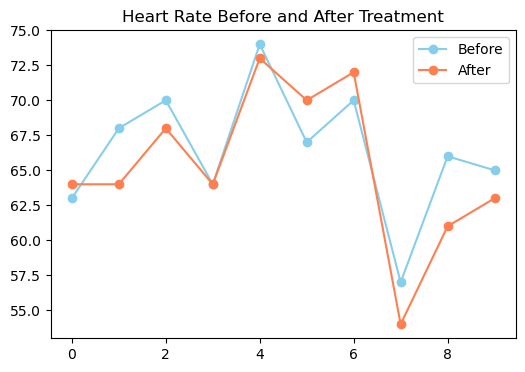

In [27]:
# create the figure and axis
fig, ax = plt.subplots(figsize=(6, 4))
# create a line plot
ax.plot(df['before'], color='skyblue', marker='o', linestyle='-',  label='Before')
ax.plot(df['after'], color='coral', marker='o', linestyle='-', label='After')
ax.legend()
ax.set_title('Heart Rate Before and After Treatment')
plt.show()

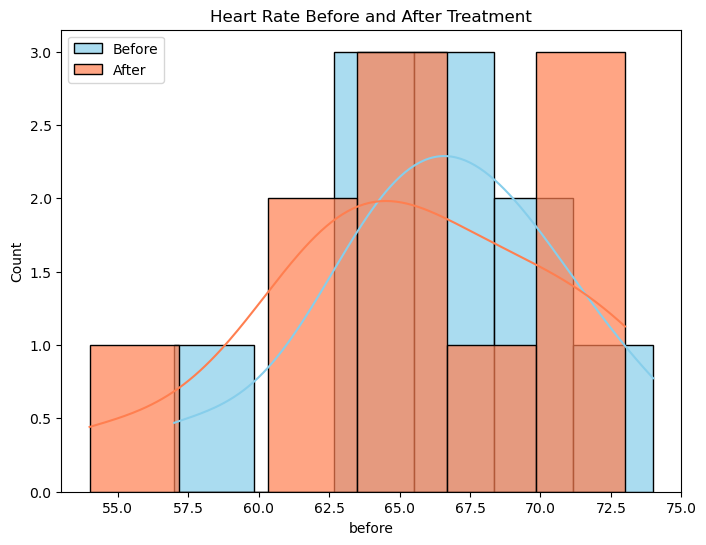

In [28]:
# create the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
# create a histogram
sns.histplot(data=df, x='before', bins=6, color='skyblue', alpha=0.7, label='Before', kde=True) # add kde=True for kernel density estimation
sns.histplot(data=df, x='after', bins=6, color='coral', alpha=0.7, label='After', kde=True)
ax.legend()
ax.set_title('Heart Rate Before and After Treatment')
plt.show()


Unlike in Task 2, we approach **histogram** creation differently by utilizing the Seaborn library. This choice was made because Seaborn not only simplifies the process but also provides the added benefit of overlaying the **Kernel Density Estimate** (KDE). The KDE is a non-parametric technique used to estimate the probability density function (PDF) of a dataset, offering a smoother and more continuous depiction of the data's distribution compared to traditional methods like plt.hist. By combining the histogram with the KDE curve, we can gain a more comprehensive understanding of the data’s distribution **$^4$**.

From an initial inspection, the data appears to closely align with a **normal distribution**, suggesting that the underlying dataset exhibits the common bell-shaped curve.

Another way to visualize data distribution is the **boxplot**. This visualization allows us to quickly assess the *central tendency*, *spread*, and any *potential outliers* for each group ("Before" and "After" in our case). Key components of the boxplot include the *minimum* and *maximum* values (the lowest and highest data points within 1.5 times the interquartile range, or IQR), the *first quartile* (or 25th percentile), the *median* (the central line within each box representing the midpoint of the data), and the *third quartile* (or 75th percentile). The box itself spans the IQR, capturing the middle 50% of data values and indicating the spread around the median. The whiskers extend from the first to the third quartile, covering values within 1.5 times the IQR, while any points beyond this range are marked as outliers, highlighting extreme values in the dataset **$^5$**.

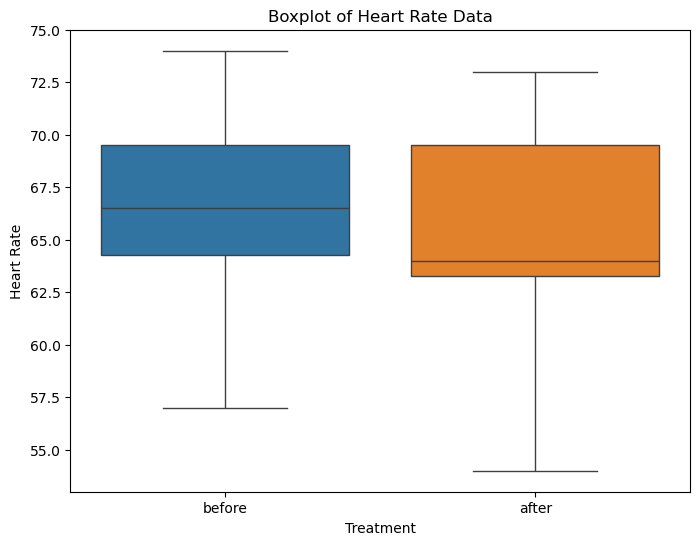

In [29]:
# create the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
# create a boxplot
ax = sns.boxplot(data=df)
ax.set_xlabel('Treatment')
ax.set_ylabel('Heart Rate')
ax.set_title("Boxplot of Heart Rate Data")
plt.show()

The boxplot analysis above shows that the *median* heart rate for the "Before" exercise program group is *slightly higher* than that of the "After" group, indicating a potential reduction in central tendency of heart rates following the program. This observed decrease in median heart rate may suggest that the exercise intervention contributed to a mild improvement in cardiovascular efficiency, as indicated by a lower resting heart rate. Additionally, the interquartile range (IQR) for the "Before" group spans approximately $63$ to $70$ bpm, while the IQR for the "After" group appears to shift downward slightly, pointing to a reduction in heart rate variability post-exercise. This reduced variability might indicate a more consistent and stable heart rate among participants after completing the exercise program. Finally, the *lack of outliers* in either group suggests that there are no extreme values in this dataset, which helps ensure that our analysis is not influenced by any anomalous heart rate readings.

While the boxplot offers a summarized view of the data distribution, the **stripplot** provides a detailed perspective by displaying each individual data point. This can be particularly valuable when working with smaller sample sizes, as it allows for a closer inspection of the data. A stripplot is a specialized form of scatter plot that visualizes one-dimensional data points along a single axis, providing insight into the distribution of a continuous variable. Unlike a typical scatter plot, the points in a stripplot are jittered to prevent overlap, making it easier to discern trends and outliers. These features make stripplots especially effective for identifying patterns and detecting anomalies in the dataset **$^6$**.

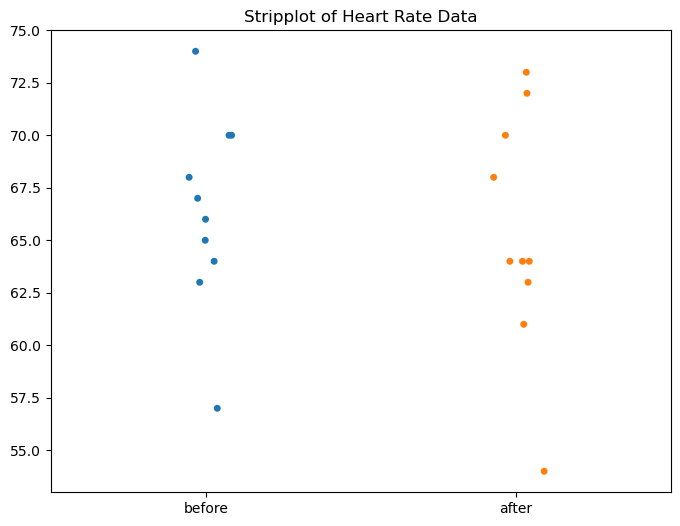

In [30]:
# create the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
# create a stripplot
sns.stripplot(data=df, ax=ax)
ax.set_title("Stripplot of Heart Rate Data")
plt.show()

In the "Before" group, the heart rate values primarily fall within the 63 to 70 bpm range, with a single value at 57 bpm that stands out as an anomaly. This pattern suggests that most patients initially had moderately high resting heart rates, with some degree of individual variation. In contrast, the "After" group displays a noticeable shift, with a larger number of values now concentrated at or below 65 bpm. The recorded range in this group spans from a low of 54 bpm to a high of 73 bpm, indicating some degree of fluctuation following the program. When examining the stripplot, we can trace each patient's heart rate change, observing a general trend of reductions in resting heart rates for several individuals. However, there are exceptions where some patients either showed a slight increase in their heart rate or maintained a similar level to their initial measurement. These differences may reflect individual responses to the exercise program or the influence of external factors that could impact heart rate, such as lifestyle changes or health conditions.

### 3. $t$-Test Introduction <a class="anchor" id="3--test-introduction"></a>

Now that we have a clear understanding of our data, we can delve into the $t$-test. The **$t$-test** is a fundamental *statistical method* used to assess whether the *means of two groups are statistically different from each other*. Developed by **William Sealy Gosset**, the $t$-test has become an essential tool in inferential statistics.

#### 3.1 $t$-Test Origin <a class="anchor" id="31--test-origin"></a>


In the early 20th century, Gosset was *employed as a chemist* at Guinness Brewery in Dublin, where his work involved *overseeing the quality of key ingredients* such as hops and barley. The brewery, aiming to enhance its production processes through scientific rigor, began hiring graduates from prestigious institutions like Oxford and Cambridge. **Gosset** was a significant part of this initiative, *offering expertise* not only in chemistry but also in statistics. Around **1904**, he proposed the introduction of statistical methods, including the *law of error*, to improve production practices. Despite his scientific insights, Gosset faced a practical challenge: much of the brewing data involved **small sample sizes**. For instance, determining the effects of fermentation temperature on beer acidity often required analyzing fewer than five data points. This posed a problem because, according to traditional statistical methods, *small sample sizes led to unreliable conclusions*, especially when the normal distribution could not be assumed. Faced with this dilemma, Gosset developed the $t$-test to make valid inferences from small datasets **$^7$**.

In 1908, Gosset published his findings in the journal Biometrika under the pseudonym "**Student**", as per Guinness's policy forbidding employees from publishing under their real names. This paper, titled "**The Probable Error of a Mean**", introduced the $t$-test, which became an essential statistical method. His choice of the pseudonym "Student" was not a personal preference but a necessity, aimed at protecting the brewery's proprietary interests. It wasn't until years later that Gosset’s true identity as "Student" was confirmed, particularly through the work of Harold Hotelling in his 1930 paper British Statistics and Statisticians Today:

>American students of statistics have long speculated as to the identity of "Student [...] I have heard guesses in this country identifying "Student" with Egon S. Pearson and with the Prince of Wales. He is now so well known in Great Britain that no confidence is violated in revealing that he is W. S. Gosset, a research chemist employed by a large Dublin brewery. This concern years ago adopted a rule forbidding its chemists to publish their findings. Gosset pleaded that his mathematical and philosophical conclusions were of no possible practical use to competing brewers, and finally was allowed to publish them, but under a pseudonym, to avoid difficulties with the rest of the staff (Hotelling (1930), p.189)**$^8$**.

In "The Probable Error of a Mean," we gain insight into the challenges Gosset faced when working with small sample sizes, where assuming a normal distribution could be problematic:

> If the number of experiments be very large, we may gave precise information as to the value of the mean, but if our sample be small, we have two sources of uncertainty: -(1) owing to the “error of random sampling” the mean of our series of experiments deviates more or less widely from the mean of the population. and (2) the sample is not sufficiently large to determine what is the law of distribution of individuals. It is usual, however, to assume a normal distribution, because, in a very large number of cases, this gives an approximation so close that a small sample will give no real information as to the manner in which the population deviates from normality […] Again, although it is well known that the method of using the normal curve is only trustworthy when the sample is “large”, no one has yet told us very clearly here the limit between “large” and “small” samples is to be drawn. The aim of the present paper is to determine the point at which we may use the tables of the probability integral in judging of the significance of the mean of a series of experiments, and to furnish alternative tables for use when the number of experiments is too few (Gosset (1908), p1-2) **$^9$**.

#### 3.2 $t$-Test: Hypothesis & Assumptions  <a class="anchor" id="32--test-hypothesis--assumptions"></a>

Building on the background and purpose of the $t$-test, it's important to first understand the **three main** types of $t$-tests, as each one serves a *different purpose* based on the nature of the data and the research question. The three types of $t$-tests are:

- **One-sample** $t$-test
- **Paired sample** $t$-test
- **Independent two-sample** $t$-test 

Once the appropriate $t$-test is chosen based on the data, we can proceed with hypothesis testing. In this context:

- **Null Hypothesis** ($H_0$): Proposes that there is *no significant difference* between the means; any observed difference is due to random variability.
- **Alternative Hypothesis** ($H_1$): Argues that there is a *significant difference* between the means, suggesting that the observed differences are not due to random variation.

In addition to these hypotheses, several assumptions must be met for a valid $t$-test:

- The data should be **continuous** and measured on an **interval** or **ratio scale**.
- The data should approximate a **normal distribution**, particularly for smaller sample sizes. For **paired** $t$-tests, the differences between paired observations should also approximate a normal distribution.
- For **independent tests**, the *observations within each sample should be independent*. **Paired tests** assume a *relationship between paired observations*.
- For the independent $t$-test only, the variances of both groups should be equal (homogeneity of variance) **$^{10}$**.
  
By understanding the principles behind the different types of $t$-tests and their underlying assumptions, we can better determine which test is most appropriate for our specific analysis. Let's begin with a brief overview of the three main types of $t$-tests.

#### 3.3 One Sample $t$-test <a class="anchor" id="33-one-sample-t-test"></a>

The **one-sample** $t$-test is used to *compare the mean of a single sample to a known or hypothesized population mean*. It helps to determine whether the sample mean significantly differs from the population mean.

The formula for the one-sample t-test is:

$$t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}}$$

where:
- $\bar{x}$ is the sample mean
- $\mu_0$ is the hypothesized population mean being tested
- $s$ is the sample standard deviation
- $n$ is the sample size **$^{11}$**.

#### 3.4 Paired sample $t$-test <a class="anchor" id="34-paired-sample--test"></a>

The **paired** $t$-test, also known as the dependent samples $t$-test, is a statistical method used to *compare the means of two related groups*. These groups typically consist of measurements taken from the same subjects at two different points in time or under two distinct conditions. The purpose of this test is to determine if the difference between the means of these two related groups is statistically significant. Since the data are paired, each data point in one group corresponds to a data point in the other group. 
  
The formula for the paired $t$-test is:

$$t = \frac{\bar{d}}{s_d / \sqrt{n}}$$

Where:
- $\bar{d}$ is the mean of the differences between each pair of observations.
- $s_d$ is the standard deviation of the differences between the paired measurements.
- $n$ is the number of pairs **$^{12}$**. 

####  3.5 Independent two-sample $t$-test <a class="anchor" id="35-independent-two-sample--test"></a>

The **independent** two-sample $t$-test is used to *compare the means of two independent groups*, where the participants or observations in one group do not influence the observations in the other group. This test is commonly used to determine if there is a significant difference between the groups on a particular variable. 
The formula for the paired $t$-test is:

$$t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$$

where:
- $\bar{X}_1$ and $\bar{X}_2$ are the sample means.
- $n_1$ and $n_2$ are the sample sizes.
- ${s_1^2}$ and ${s_2^2}$ are the sample variances of the two groups **$^{13}$**.

### 4. Choosing the Appropriate $t$-Test for heart beat dataset <a class="anchor" id="4-choosing-the-appropriate--test-for-heart-beat-dataset"></a>

Now that we have a clear understanding of the three types of $t$-tests, we can begin determining which one is appropriate for our task. The **objective** of this analysis is to *compare the resting heart rates* of patients *before* and *after* they participate in a two-week *exercise program*. The first thing to note is that the measurements are taken from the *same group of patients* at *two different points in time*. Specifically, we have two sets of data: one representing resting heart rates before the program, and the other representing the heart rates after the program. Since the same individuals are measured before and after the exercise program, the *data is considered dependent*. This dependency between the two sets of measurements suggests that the appropriate statistical test for analyzing the data is the **Paired Sample** $t$-test.

### 5. $t$-test Assumption Check <a class="anchor" id="5--test-assumption-check"></a>

Before proceeding with the t-test analysis, it is essential to ensure that all the assumptions underlying the test are met by our data. Let’s begin by addressing the first assumption regarding continuous data. As observed during the exploratory data analysis (EDA), both the "before" and "after" columns consist exclusively of continuous values, confirming that this assumption holds true.

Next, we examine the second assumption, which pertains to the relationship between paired observations. Our data are derived from the same patients, measured within a two-week range. This pairing clearly satisfies the requirement for dependent observations, demonstrating that the data meet this assumption as well.

Lastly, we address the third assumption: that the data should approximate a normal distribution. We have already confirmed that both the "before" and "after" measurements follow this assumption through the use of histograms and boxplots. However, one aspect that remains untested is whether the differences between paired observations also approximate a normal distribution. We need to examine this specifically to ensure the validity of the t-test results. Also in this case, we will visualize a histogram and boxplot to gain a better understanding.

In [31]:
# creating a new column to store the difference between the before and after values
df['Difference'] = df['before'] - df['after']
print(f"The new DataFrame with the difference column\n {df}")

The new DataFrame with the difference column
    before  after  Difference
0      63     64          -1
1      68     64           4
2      70     68           2
3      64     64           0
4      74     73           1
5      67     70          -3
6      70     72          -2
7      57     54           3
8      66     61           5
9      65     63           2


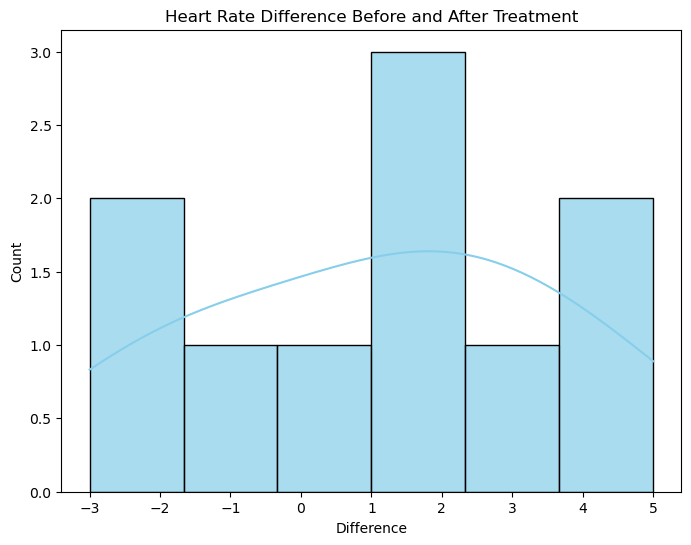

In [32]:
# create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
# create a histogram
sns.histplot(data=df, x='Difference', bins=6, color='skyblue', alpha=0.7, kde=True)
ax.set_title('Heart Rate Difference Before and After Treatment')
plt.show()

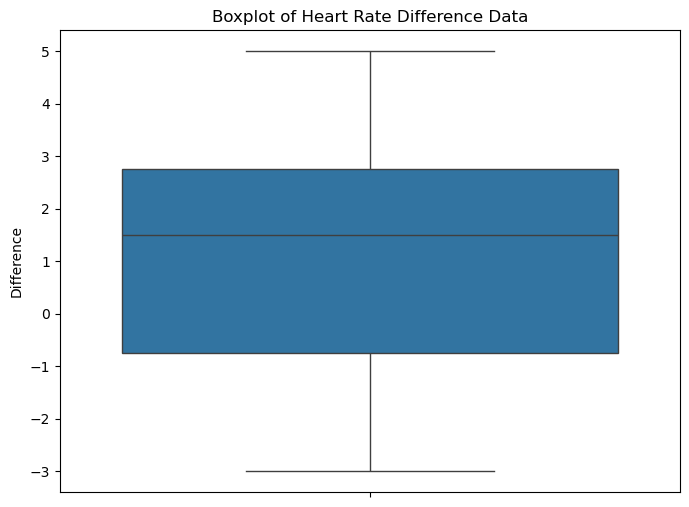

In [33]:
# create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
# create a boxplot
sns.boxplot(data=df['Difference'], ax=ax)
ax.set_title("Boxplot of Heart Rate Difference Data")
plt.show()


By inspecting the boxplot, we can confirm that there are no apparent outliers in the difference columns as well.

An additional method to assess and verify the normality assumption of the data is by conducting the Shapiro-Wilk test. Since we haven't yet performed this test for the "before" and "after" columns, it would be beneficial to include this analysis as well.

In [34]:

# create list of column names
columns = ['before', 'after', 'Difference']

# Significance level
alpha = 0.05

# Loop through each column and perform the Shapiro-Wilk test
for column in columns:
    statistic, p_value = stats.shapiro(df[column])
    
    # Print results
    print(f"Shapiro-Wilk test for {column}:")
    print(f"statistic = {statistic}, p-value = {p_value}")
    
    # Check if the data is normally distributed
    if p_value > alpha:
        print(f"The sample for {column} looks Gaussian (fail to reject H0)\n")
    else:
        print(f"The sample for {column} does not look Gaussian (reject H0)\n")


Shapiro-Wilk test for before:
statistic = 0.9726138710975647, p-value = 0.9139653444290161
The sample for before looks Gaussian (fail to reject H0)

Shapiro-Wilk test for after:
statistic = 0.9397047758102417, p-value = 0.5497328639030457
The sample for after looks Gaussian (fail to reject H0)

Shapiro-Wilk test for Difference:
statistic = 0.9752339720726013, p-value = 0.9346861243247986
The sample for Difference looks Gaussian (fail to reject H0)



### 6. Performing the $t$-test <a class="anchor" id="6-performing-the--test"></a>


Based on the results from both the visualization and the normality test, we observe that the data follows a normal distribution. With this confirmation, we can proceed to conduct the $t$-test for further analysis.

Before proceeding, let's clearly state our **null hypothesis**: The *exercise program has no effect on the mean resting heart rate*, meaning there is no difference between the heart rates before and after the program. This can be mathematically expressed as: 

$$H_0 : \mu_{before} = \mu_{after}$$
​


To test the validity of the **null hypothesis** ($H_0$), we will follow the methodology outlined in **Shier R.**'s 2004 article "*Statistics: 1.1 Paired t-tests* **$^{14}$**" for conducting a $t$-test. This will involve a series of steps for analysis and calculation, which will be implemented through Python code to ensure accurate results.


1. We begin by computing the change in heart rate between the "before" and "after" measurements for each individual. This difference provides insights into the variation in heart rate, reflecting both increases and decreases as a result of the exercise program. The "Difference" column has already been established during our initial efforts to assess the validity of the assumption, providing a clear record of these changes.

In [35]:
# review the difference values
print(f"Differences:\n {df['Difference']}")


Differences:
 0   -1
1    4
2    2
3    0
4    1
5   -3
6   -2
7    3
8    5
9    2
Name: Difference, dtype: int64


2. Next, we compute the **mean** ($\bar{d}$) and the **standard deviation** ($s_d$) of the *difference column*. The mean provides an average value that reflects the overall change in heart rates after the program, while the standard deviation measures the variability or dispersion of the individual differences from the mean.

In [36]:
# compute the mean
mean_difference = df['Difference'].mean()
# compute the standard deviation
std_dev_difference = df['Difference'].std()

print(f"Mean of Differences: {mean_difference}")
print(f"Standard Deviation of Differences: {std_dev_difference}")


Mean of Differences: 1.1
Standard Deviation of Differences: 2.601281735350223


3. Using this information, we can calculate the **standard error** of the mean difference. This is done by dividing the standard deviation of the differences by the square root of the sample size:

$$SE(\bar d) = \frac {s_d}{\sqrt{n}}$$   

The standard error measures the precision with which the sample mean difference estimates the true population mean difference.

In [37]:
# Number of observations
n = len(df)

# Calculate the standard error of the mean difference
standard_error = std_dev_difference / np.sqrt(n)
print(f"Standard Error of the Mean Difference: {standard_error}")

Standard Error of the Mean Difference: 0.8225975119502045


4. calculate the **$t$-statistic**, which quantifies the difference between the means of the paired groups in terms of standard error

In [38]:
# calculate the t-statistic
t_statistic = mean_difference / standard_error
print(f"T-Statistic (T): {t_statistic}")

T-Statistic (T): 1.3372274824806278


5. Finally, we calculate the **p-value** to assess the statistical significance of the observed mean difference. To do this, we compare the calculated t-statistic against the t-distribution with n−1 degrees of freedom. The p-value indicates whether the difference in means is statistically significant.

In Python, we can streamline this process by using `scipy.stats`, which allows us to compute the p-value directly without needing to reference t-distribution tables manually. This method provides a more efficient and precise way of obtaining the p-value for hypothesis testing **$^{15}$**.

In [39]:
df_degrees_of_freedom = n - 1

# Calculate the p-value
p_value = stats.t.sf(t_statistic, df_degrees_of_freedom) * 2  
print("p-value:", p_value)

p-value: 0.21396011317404626


A simpler and faster way to find the $t$-statistic and p-value is to directly use `ttest_rel`, which is a function in the SciPy library designed for performing paired sample $t$-tests. This function returns two key outputs: the $t$-statistic and the p-value **$^{16}$**.

In [40]:
t_statistic_scipy, p_value = ttest_rel(df["before"], df["after"])

print("T-Statistic (Scipy):", t_statistic_scipy)
print("P-Value (Scipy):", p_value)

T-Statistic (Scipy): 1.337227482480628
P-Value (Scipy): 0.21396011317404623


As demonstrated in Task 1, the p-value is used to assess the significance of the results, with a significance level typically set at 0.05. In this case, the p-value obtained is 0.21, which is greater than the threshold of 0.05. Therefore, we fail to reject the null hypothesis. This suggests that there is no statistically significant difference in the resting heart rates before and after the exercise program.

### 7. References <a class="anchor" id="references-task3"></a>

**$^1$** xkcd (n.d.). "*T DISTRIBUTION*". [xkcd](https://xkcd.com/1347/)

**$^2$** Abhirami V.S. (2023). "*NumPy Array vs Pandas Series*". [Medium](https://medium.com/@AbhiramiVS/numpy-array-vs-pandas-series-b07f080fb7d5)

**$^3$** Pandas Documentation (n.d.). "*pandas.DataFrame.describe*".[Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)

**$^4$** Geeks for geeks (2021). "*How to Make Histograms with Density Plots with Seaborn histplot?*". [Geeks for geeks](https://www.geeksforgeeks.org/how-to-make-histograms-with-density-plots-with-seaborn-histplot/)

**$^5$** Gaonkar A. (2021). "*Understanding Box-and-Whisker Plot*". [Medium](https://medium.com/swlh/understanding-box-and-whisker-plot-275e9163eac0)

**$^6$** Pierian Training (2023). "*Understanding the seaborm stripplot in Python*". [Pierian Training](https://pieriantraining.com/understanding-the-seaborm-stripplot-in-python/#:~:text=A%20strip%20plot%20is%20a,and%20outliers%20in%20the%20data.)

**$^7$** Trkulja, V., & Hrabač, P. (2020). "*The role of t test in beer brewing*". [Croatian medical journal, 61(1), 69–72](https://doi.org/10.3325/cmj.2020.61.69)

**$^8$** Hotelling H., (1930). "*British Statistics and Statisticians Today*".[Journal of the American Statistical Association, Vol. 25, No. 170, pp. 186-
190](https://www.jstor.org/stable/2277631?origin=JSTOR-pdf)

**$^9$** Student (1908). "*The Probable Error of a Mean*". [Biometrika, Volume 6, Issue 1, pp. 1-25](https://seismo.berkeley.edu/~kirchner/eps_120/Odds_n_ends/Students_original_paper.pdf)

**$^{10}$** Dey R. (2024). "*Understanding the t-Test in Statistics*". [Medium](https://medium.com/@roshmitadey/understanding-the-t-test-in-statistics-6da1ded28a42)

**$^{11}$** McClenaghan E. (2024). "*The One Sample T Test*". [Technology Networks](https://www.technologynetworks.com/tn/articles/the-one-sample-t-test-387917#D1)

**$^{12}$** Complete Dissertation (n.d.). "*Paired T-Test*". [Complete Dissertation](https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/paired-sample-t-test/)

**$^{13}$** Umass Amherst (n.d.). "*The t-test revisited: Tests for the sample mean*". [University of Massachusetts Amherst](https://people.umass.edu/bwdillon/files/linguist-609-2020/Notes/TwoSampleT-Test.html)

**$^{14}$** Shier R. (2004). "*Statistics: 1.1 Paired t-tests*".[Mathematics Learning Support Center](https://www.statstutor.ac.uk/resources/uploaded/paired-t-test.pdf)

**$^{15}$** StackOverFlow (2014). "*Finding Two-Tailed P Value from t-distribution and Degrees of Freedom in Python*". [StackOverFlow](https://stackoverflow.com/questions/23879049/finding-two-tailed-p-value-from-t-distribution-and-degrees-of-freedom-in-python)

**$^{16}$** Scipy Documentation (n.d.). "*scipy.stats.ttest_rel*". [Scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#ttest-rel)

## Task 4: **ANOVA**


<figure style="text-align:center;">
    <img src="images/One Way ANOVA (Welch Test).jpeg" alt="ANOVA" width="550"/>
    <figcaption>Photo credit<sup>1</sup> </figcaption>
</figure>

### Table of Contents
1. [Problem Statement](#task4-1)

### 1. Problem Statement <a class="anchor" id="task4-1"></a>

>In this test we will estimate the probability of committing a type II error in specific circumstances. To begin, create a variable called `no_type_ii` and set it to `0`.
>
>Now use a loop to perform the following test 10,000 times.
>
>1. Use `numpy.random.normal` to generate three samples with 100 values each. Give each a standard deviation of `0.1`. Give the first sample a mean of `4.9`, the second a mean >of `5.0`, and the third a mean of `5.1`.
>2. Perform one-way anova on the three samples and add `1` to `no_type_ii` whenever a type II error occurs.
>
>Summarize and explain your results.

### 2. The Origins of the ANOVA Test

The Analysis of Variance (ANOVA) test, developed by R.A. Fisher in 1918, represents a significant advancement in statistical methodology. Although initially created to address specific needs in agricultural research, its practical utility quickly extended to a wide range of fields. The procedure gained widespread recognition following its inclusion in Fisher's seminal work, Statistical Methods for Research Workers (1925), specifically in Chapter VII, titled "Intraclass Correlations and the Analysis of Variance." This chapter emphasized ANOVA's foundational role in experimental design and its ability to analyze variations within and between groups systematically $^1$.

### 3. ANOVA explanation

The primary distinction between ANOVA and the t-test lies in their scope. While the t-test is limited to comparing two groups, ANOVA allows for the comparison of three or more group means using a single statistical test. As Fisher noted in his 1925 work:

>The present method may be regarded as an extension of the method of Chapter V, appropriate when we wish to compare more than two means. Equally, it may be regarded as an extension of the methods of Chapter IV" (Fisher, 1925. p. 229)$^1$. 

This insight highlights the expanded applicability of ANOVA in handling more complex experimental designs, offering a more efficient and comprehensive approach to hypothesis testing across multiple groups. Although the primary focus of the current task is on performing a one-way ANOVA, it's important to note that there are several types of ANOVA tests and the choice of which ANOVA to use depends on the nature of the data available:

1. One-way ANOVA
2. Two-way ANOVA: Applied when examining the effects of two different factors simultaneously, along with their interaction, on a dependent variable.
3. Repeated Measures ANOVA: Suitable for situations where the same subjects are used across multiple conditions or time points, allowing for the analysis of changes over time or under different conditions while controlling for individual differences $^3$.

#### 3.1 One-Way ANOVA

A one-way ANOVA is used to determine whether there are any statistically significant differences between the means of three or more independent (unrelated) groups. The one-way ANOVA is an omnibus test, meaning it can only tell you whether there is a significant difference somewhere among the groups, but it does not specify which specific groups are different. This test is based on two hypotheses:

- The null hypothesis proposes that the population means for all treatments are equal.
- The alternative hypothesis suggests that at least one treatment has a population mean that differs from the others.

Additionally, the following assumptions must be satisfied:

- Independence of Observations: Each observation must be independent. The value of one observation should not affect the value of any other observation.
- Normality: The random errors within each treatment group, which represent the deviations from the group means, should follow a normal (Gaussian) distribution.
- Homogeneity of Variance: The variance within each of the groups should be approximately equal $^4$.

Let's generate our three samples and evaluate whether they meet the assumptions required for performing a one-way ANOVA.

In [41]:
# Sample parameters
n_samples = 100
std = 0.1
mean = [4.9, 5.0, 5.1]

# Generate three samples with the given means and standard deviation
sample1 = np.random.normal(mean[0], std, n_samples)
sample2 = np.random.normal(mean[1], std, n_samples)
sample3 = np.random.normal(mean[2], std, n_samples)

The assumption of independence among observations is typically confirmed in the above case due to the design of the task. The samples were generated through random sampling using the `random.normal()` function, which inherently produces independent observations. 

To assess whether the data and individual samples follow a normal distribution, we will use visual tools such as histograms and Q-Q plots. Additionally, we will overlay the Probability Density Function (PDF) of the normal distribution on the histograms to provide a clearer comparison and deeper insight into the distribution's alignment with normality.

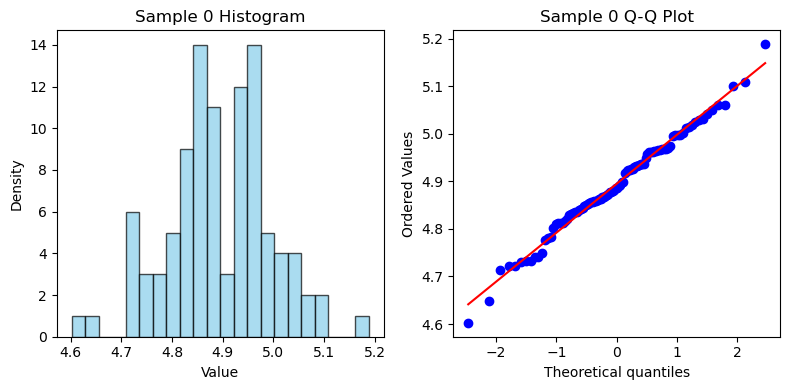

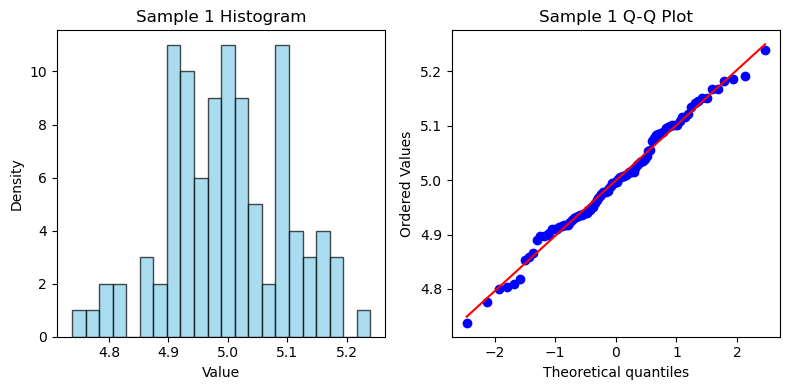

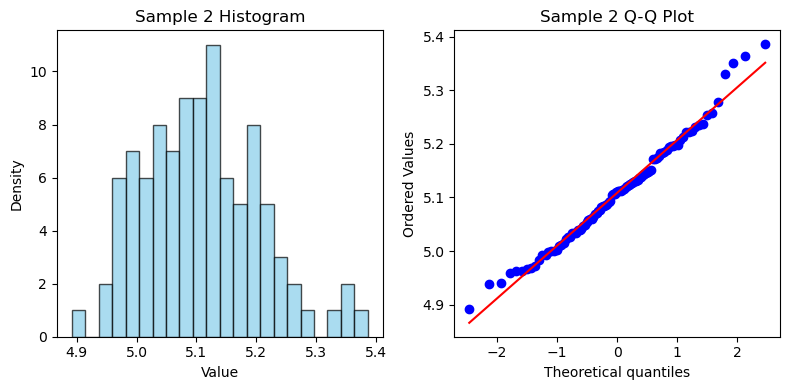

In [42]:
# visualize histograms and Q-Q plots for each sample
for i, sample in enumerate([sample1, sample2, sample3]):
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    
    # Histogram properties
    ax[0].hist(sample, bins=22, alpha=0.7, color='skyblue', edgecolor='black')    
    ax[0].set_title(f"Sample {i} Histogram")
    ax[0].set_xlabel("Value")
    ax[0].set_ylabel("Density")
    
    # Q-Q Plot
    stats.probplot(sample, dist="norm", plot=ax[1])
    ax[1].set_title(f"Sample {i} Q-Q Plot")
    
    plt.tight_layout()
    plt.show()


it seems that our samples are following a normal distribution.

the final assumption is the Homogeneity of Variance test, which evaluates whether the variance across multiple groups is consistent. To verify this, we will perform Levene's Test, a widely used method to assess variance equality among groups. Levene's Test specifically examines whether the null hypothesis, that the variances across the groups are equal, can be supported. Conversely, the alternative hypothesis posits that the variances differ, indicating that the groups are drawn from populations with unequal variances $^5$. 

In [43]:
# Levene's test
stat, p_value = stats.levene(sample1, sample2, sample3)
print(f"Levene's Test: p-value = {p_value}")
if p_value > 0.05:
    print("The variances appear to be equal (homogeneity of variance assumption satisfied).\n")
else:
    print("The variances do not appear to be equal (homogeneity of variance assumption violated).\n")


Levene's Test: p-value = 0.916137624027072
The variances appear to be equal (homogeneity of variance assumption satisfied).



As with the T-Test tasks, there are two approaches to conducting a one-way ANOVA test: the detailed mathematical method and the more efficient approach using the `f_oneway` function from the SciPy library. We will demonstrate both methods to gain a deeper understanding. The reason for choosing this dual approach is that the mathematical method provides insight into the underlying mechanics of the test, helping us grasp the underlying calculations and logic. On the other hand, using the `f_oneway` function allows us to perform the test quickly and efficiently, serving as a practical tool for larger or more complex datasets. The process will be based on the step-by-step instructions outlined in Bobbitt Z.'s 2020 article, "[How to Perform a One-Way ANOVA by Hand](https://www.statology.org/one-way-anova-by-hand/)," published on the Statology website. This guide provides a detailed approach to conducting a One-Way ANOVA manually, and the following steps will closely align with its methodology.

Step 1: Begin by calculating the mean for each of the three groups individually, and then determine the overall mean by considering all the data across the groups combined.

In [44]:
# Combine all groups into a single array
all_data = np.concatenate([sample1, sample2, sample3])

# Calculate group means and overall mean
mean_sample1 = np.mean(sample1)
mean_sample2 = np.mean(sample2)
mean_sample3 = np.mean(sample3)
mean_overall = np.mean(all_data)

print(f"Mean overall: {mean_overall}")

Mean overall: 5.001041274143876


Step 2: Next, calculate the Sum of Squares Between Groups (SSR) using the formula:

$$SSR = \sum (X_j - \overline{X})^2$$

where:
- $n$ represents the number of observations in each group,
- $X_j$ is the mean of each individual group,
- $\overline{X}$ is the overall mean of all groups combined.

In [45]:

# calculate the sum of squares between groups
ssr = (len(sample1) * (mean_sample1 - mean_overall)**2 +
       len(sample2) * (mean_sample2 - mean_overall)**2 +
       len(sample3) * (mean_sample3 - mean_overall)**2)
print(f"Sum of Squares Between Groups (SSR): {ssr}")


Sum of Squares Between Groups (SSR): 2.2841632049557776


Step 3: The next step involves calculating the sum of squared errors (SSE), which quantifies the variance within the data by measuring the difference between each observation and its corresponding group mean. This is done using the formula: 

$$SSE = \sum (X_{ij} - \overline{X}_{j})^2$$

In [46]:
# calculate the sum of squares within groups
sse = (np.sum((sample1 - mean_sample1)**2) +
       np.sum((sample2 - mean_sample2)**2) +
       np.sum((sample3 - mean_sample3)**2))
print(f"Sum of Squares Within Groups (SSE): {sse}")

Sum of Squares Within Groups (SSE): 2.980412807187614


Step 4: Next, we will calculate the total sum of squares (SST)


In [47]:
# calculate SST
sst = ssr + sse
print(f"Sum of Squares Total (SST): {sst}")

Sum of Squares Total (SST): 5.264576012143392


Step 5: Fill in the ANOVA Table


In [48]:
# Calculate degrees of freedom
df_between = 3 - 1  # Number of groups - 1
df_within = len(all_data) - 3  # Total number of observations - Number of groups

# Calculate mean squares
ms_between = ssr / df_between
ms_within = sse / df_within

# Calculate the F-statistic
f_statistic = ms_between / ms_within

print(f"F-Statistic: {f_statistic}")
print(f"Degrees of Freedom (Between): {df_between}")
print(f"Degrees of Freedom (Within): {df_within}")
print(f"Mean Squares (Between): {ms_between}")
print(f"Mean Squares (Within): {ms_within}")


F-Statistic: 113.80914587332225
Degrees of Freedom (Between): 2
Degrees of Freedom (Within): 297
Mean Squares (Between): 1.1420816024778888
Mean Squares (Within): 0.010035059956860652


Step 6: Calculate the p-value and interpret the findings.

In [49]:
# calculate the p-value
p_value = stats.f.sf(f_statistic, df_between, df_within)
# Conclusion
alpha = 0.05
if p_value < alpha:
    print(f"Reject the null hypothesis: There is a significant difference between the group means. p-value = {p_value}")
else:
    print(f"Fail to reject the null hypothesis: There is no significant difference between the group means. p-value = {p_value}")


Reject the null hypothesis: There is a significant difference between the group means. p-value = 2.0304089647384103e-37


let's now perform the same analysis with the f_oneway function $^6$:

In [50]:
scipy_f_stat, scipy_p_value = f_oneway(sample1, sample2, sample3)
print(f"F-Statistic (Scipy): {scipy_f_stat}")
print(f"P-Value (Scipy): {scipy_p_value}")

F-Statistic (Scipy): 113.80914587332342
P-Value (Scipy): 2.0304089647370505e-37


After conducting the one-way ANOVA test using the SciPy function, we can confidently affirm the previous observation: the null hypothesis is rejected. The p-value, which is exceedingly small, provides strong evidence against the null hypothesis, indicating that there are significant differences between the group means. Given that this p-value is well below the typical significance level (e.g., 0.05), we can conclude that there is a significant difference between the group means. This result supports the rejection of the null hypothesis and suggests that the factors being tested have a measurable effect on the dependent variable.

### 4. post-hoc tests

While the results above provide valuable insights, a key limitation of the ANOVA test remains: it is an omnibus test, meaning it only determines whether there are overall differences among group means but does not identify which specific groups differ from each other. Rejection of the null hypothesis indicates that at least one pair of group means differs significantly, but it doesn’t specify which pairs are responsible for this difference. To uncover these specific pairwise differences, post hoc tests are necessary, which allow for a deeper and more detailed understanding of the results. Among the most widely used post hoc methods is Tukey’s Honestly Significant Difference (HSD) test, known for its simplicity and reliability in identifying significant pairwise differences $^8$.

The Tukey HSD test is designed to follow an ANOVA when the null hypothesis of equal group means is rejected. It uses the concept of the "honestly significant difference," a statistical threshold based on the Studentized range distribution (or q distribution), to evaluate pairwise comparisons between groups. This distribution, developed by William Sealy Gosset (known as "Student"), models the sampling distribution of the largest difference between group means under the null hypothesis. Tukey’s HSD test assesses all pairwise comparisons simultaneously while controlling the family-wise error rate. This method ensures that each comparison is evaluated consistently and maintains statistical rigor, making the test particularly robust against the increased risk of Type I errors associated with multiple comparisons. As a result, Tukey’s HSD test provides a comprehensive and reliable approach for identifying which group means differ significantly from one another after conducting an ANOVA $^9$.

in Python, the scipy.stats.tukey_hsd function is used to perform Tukey's Honestly Significant Difference (HSD) test. This function is part of the SciPy library and is designed to facilitate pairwise comparisons of group means following an ANOVA test. The function provides a clear summary of the test, including the mean differences, confidence intervals (Range within which the true mean difference lies with a specified confidence level.), and p-values for each pair of groups $^{10}$ .  

In [51]:
# perform the tukey hsd test
res = tukey_hsd(sample1, sample2, sample3)

print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.104     0.000    -0.138    -0.071
 (0 - 2)     -0.214     0.000    -0.247    -0.180
 (1 - 0)      0.104     0.000     0.071     0.138
 (1 - 2)     -0.109     0.000    -0.143    -0.076
 (2 - 0)      0.214     0.000     0.180     0.247
 (2 - 1)      0.109     0.000     0.076     0.143



From the results of Tukey's HSD test, we can observe that the p-values for all pairwise comparisons are extremely small (all less than the typical significance level of 0.05). This indicates that the differences between each pair of group means are statistically significant, leading us to reject the null hypothesis in all cases.

#### 5. Error Testing

Having established a clear understanding of the ANOVA result and the rejection of the null hypothesis, we can now proceed to the final step of the task. In this phase, we will implement a loop to run the test 10,000 times. This will allow us to estimate the probability of committing a Type II error, providing further insight into the performance of the statistical test under these specific conditions. Before proceeding with our analysis and estimating the probability of committing a Type II error under specific conditions, it is essential to first understand what this error entails and the factors that contribute to its occurrence in hypothesis testing. In hypothesis testing, the primary goal is to determine whether there is sufficient evidence to reject the null hypothesis, which asserts that no relationship exists between the variables being examined. However, due to the inherent uncertainty in inferential statistics, errors can occur:

- **Type I error** (*false positive*) arises when the *null hypothesis is rejected despite being true*. This error becomes more likely in situations involving multiple comparisons, as each additional test adds to the cumulative risk of incorrectly rejecting the null hypothesis.
- **Type II error** (*false negative*) occurs when the *null hypothesis is not rejected despite it being false*, meaning a real effect or difference is overlooked. The probability of a Type II error is denoted as $\beta$, and the power of a test (1 − $\beta$) measures its ability to detect a true effect $^{11}$.

As we saw The ANOVA test helps reduce Type I error inflation by evaluating differences between multiple groups simultaneously, rather than conducting multiple pairwise comparisons. By doing this, it controls the overall error rate and avoids the inflation of Type I error that occurs when multiple independent tests are performed.  

In [52]:
# Parameters
n_simulations = 10000
alpha_set = [ 0.01, 0.05, 0.1, 0.2, 0.5, 0.9]

# Initialize dictionary to store Type II error counts for each alpha
type_ii_errors = {alpha: 0 for alpha in alpha_set}

# Simulations
for _ in range(n_simulations):
    # Perform one-way ANOVA
    _, p_value = f_oneway(sample1, sample2, sample3)
    
    # Check Type II errors for each significance level
    for alpha in alpha_set:
        if p_value > alpha:  # Fail to reject null hypothesis
            type_ii_errors[alpha] += 1

# Calculate and print Type II error rates
print("Type II Error Rates for Different Significance Levels:")
for alpha, count in type_ii_errors.items():
    type_ii_error_rate = count / n_simulations
    print(f"Alpha: {alpha:.3f} | Type II Error Rate: {type_ii_error_rate:.4f} | p_value: {p_value}")



Type II Error Rates for Different Significance Levels:
Alpha: 0.010 | Type II Error Rate: 0.0000 | p_value: 2.0304089647370505e-37
Alpha: 0.050 | Type II Error Rate: 0.0000 | p_value: 2.0304089647370505e-37
Alpha: 0.100 | Type II Error Rate: 0.0000 | p_value: 2.0304089647370505e-37
Alpha: 0.200 | Type II Error Rate: 0.0000 | p_value: 2.0304089647370505e-37
Alpha: 0.500 | Type II Error Rate: 0.0000 | p_value: 2.0304089647370505e-37
Alpha: 0.900 | Type II Error Rate: 0.0000 | p_value: 2.0304089647370505e-37


A p-value this small indicates an extremely strong evidence against the null hypothesis. The one-way ANOVA test is effectively detecting a significant difference between the means of the three samples. The p-value is much smaller than typical significance thresholds (e.g., 0.05, 0.01, 0.001), meaning the null hypothesis will be rejected in virtually all cases. Type II error occurs when the test fails to reject the null hypothesis when it is false. However, if the p-value is extremely small, the test will always reject the null hypothesis, meaning Type II errors won't happen. In your case, the difference between the group means (4.9, 5.0, 5.1) is large enough compared to the standard deviation (0.1) that the test can easily detect it as significant. This leads to an effectively zero chance of committing a Type II error in your simulation. With such a large difference between the means, small standard deviation, and relatively large sample size (100), the power of the test is very high. Power is the probability of correctly rejecting the null hypothesis when it is false, and it's inversely related to the probability of Type II errors. A high-power test (close to 1) means a very low chance of Type II errors. In other words, since the test is almost guaranteed to detect the effect, you won't see Type II errors in your simulations $^{12}$.

### References

$^1$ The statistic of life (2017). "*One Way ANOVA (Welch Test)*". [The statistic of life](https://the-statistics-of-life.blogspot.com/2017/01/one-way-anova-welch-test.html?spref=pi)

$^1$ McDonough M. (2024). "*ANOVA*". [Britannica](https://www.britannica.com/topic/variance-analysis-statistics)

$^2$ Fisher R.A. (1925). "*Statistical Methods for Research Workers*". $11^{th}$ edition, Oliver and Boyd.

$^3$ Reddit (2017). "*What is the difference between two-way ANOVA, repeated measures, and mixed-effects ANOVA?*" [Reddit](https://www.reddit.com/r/AskStatistics/comments/7bm3qj/what_is_the_difference_between_twoway_anova/?rdt=54413)

$^4$ Martin G., Larson SD (n.d). "*Analysis of Variance*".[Statistical Primer for Cardiovascular Research](https://www.ahajournals.org/doi/pdf/10.1161/circulationaha.107.654335)

$^5$ Malikah N. (2022). "*Python: Homogeneity of Variance Check*". [kaggle](https://www.kaggle.com/code/nenamalikah/python-homogeneity-of-variance-check)

$^6$ Anand (2024). "*ANOVA : Building and Understanding ANOVA in Python 🐍📶*". [DEV](https://dev.to/kammarianand/anova-building-and-understanding-anova-in-python-3km7#)

$^7$ Banerjee A., Chitnis U. B., Jadhav S. L., Bhawalkar J. S., Chaudhury S. (2009). "*Hypothesis testing, type I and type II errors*". [Ind Psychiatry J. 2009 Jul-Dec;18(2):127–131.](https://pmc.ncbi.nlm.nih.gov/articles/PMC2996198/)

$^8$ Chen T, Xu M, Tu J, Wang H, Niu X. (2018). "*Relationship between Omnibus and Post-hoc Tests: An Investigation of performance of the F test in ANOVA*". [Shanghai Arch Psychiatry. 30(1):60-64](https://pmc.ncbi.nlm.nih.gov/articles/PMC5925602/)

$^9$ Williams L. J., Abdi H. (2010). "*Tukey’s Honestly Significant Difference (HSD) Test*". [Neil Salkind (Ed.), Encyclopedia of Research Design. Thousand Oaks, CA](https://personal.utdallas.edu/~herve/abdi-HSD2010-pretty.pdf)

$^{10}$ Scipy Documentation (n.d.). "*scipy.stats.tukey_hsd*". [Scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html)

$^{11}$ Banerjee A., Chitnis U. B., Jadhav S. L., Bhawalkar J. S., Chaudhury S. (2009). "*Hypothesis testing, type I and type II errors*". [Ind Psychiatry J. 2009 Jul-Dec;18(2):127–131.](https://pmc.ncbi.nlm.nih.gov/articles/PMC2996198/)

$^{12}$ David S. Moore, George P. McCabe, Bruce Craig (2007). "*Introduction to the Practice of Statistics (6th Edition)*", W. H. Freeman, p.410

***
End